In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from __future__ import division

import os

import numpy as np
import math as m

from glob import glob

import reduce_dblspec 
import pipeline

from astropy import constants as const
from astropy.stats import sigma_clip



from astropy.io import fits
from astropy import units as u
from astropy import modeling
from astropy.modeling import models, fitting
from astropy.table import Table
from photutils import centroid_com


from astropy import modeling
from astropy import constants as cnst
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp


# Dispersion Solutions
### RED 1.0"

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


used atlas plot limits for Red side


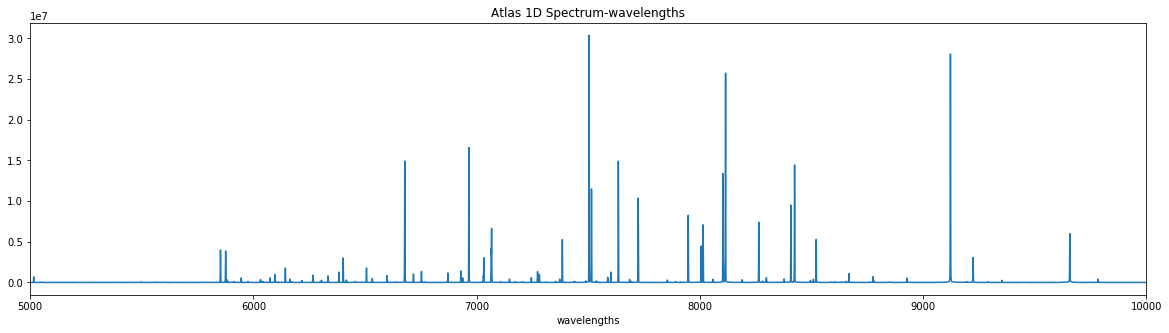

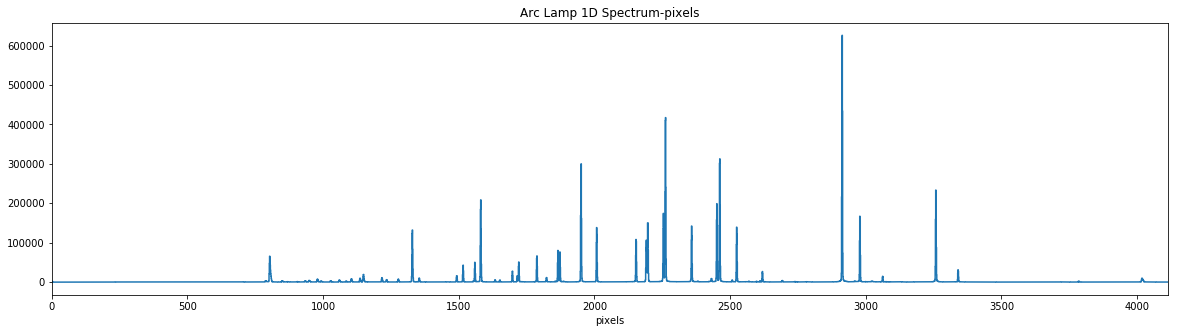

In [2]:
#nameing all the datafiles needed
all_side_files_red10 = 'DoubleSpec/20151108/red*.fits' #redside
atlasfiles_red10 = fits.open('henear.fits') #NOAO atlas #redside
arcfiles_red10 = 'DoubleSpec/20151108/red0012.fits' #redside
linelist_red10 = reduce_dblspec.HENEAR_LINE_LIST
flatid = 'DomeFlats 1p0'

specset_red10 = pipeline.dispersion(all_side_files_red10, atlasfiles_red10, arcfiles_red10, linelist_red10,flatid)

/Users/dee/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


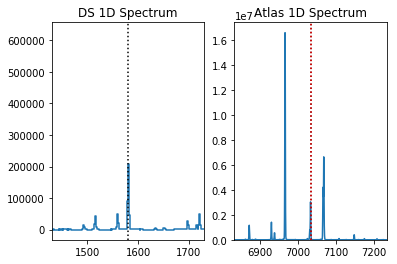

In [3]:
#collecting guesses of matching lines from above graphs

#entering(px,wl)guesses & data
pipeline.guess_plot(1580,7032.4131,specset_red10) #outputs (pixel guess, nearest wl/id in linelist)

#collect guesses here ~5 seems good
pixel_guesses_red10 = [2911,2260,1949,3256]#,1580]
atlas_lines_red10 = [9122.9674,8115.311,7635.106,9657.7863]#,7032.4131,]
guesses_red10 = list(zip(pixel_guesses_red10, atlas_lines_red10)) #making tuples to pass into fcn later

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


chose ds for redside
chose guesses for redside
Skipping line HeI at wl=3187.745 - out of wl min/max
Skipping line ArII at wl=3307.2283 - out of wl min/max
Skipping line ArI at wl=3319.3446 - out of wl min/max
Skipping line ArII at wl=3350.9243 - out of wl min/max
Skipping line HeI at wl=3354.55 - out of wl min/max
Skipping line ArI at wl=3373.4823 - out of wl min/max
Skipping line ArII at wl=3376.4359 - out of wl min/max
Skipping line ArII at wl=3388.5309 - out of wl min/max
Skipping line NeII at wl=3397.866 - out of wl min/max
Skipping line ArI at wl=3406.1804 - out of wl min/max
Skipping line ArII at wl=3414.4583 - out of wl min/max
Skipping line NeI at wl=3417.9035 - out of wl min/max
Skipping line ArII at wl=3421.6107 - out of wl min/max
Skipping line ArII at wl=3454.0952 - out of wl min/max
Skipping line ArII at wl=3464.1272 - out of wl min/max
Skipping line NeI at wl=3472.5711 - out of wl min/max
Skipping line ArII at wl=3476.7474 - out of wl min/max
Skipping line ArII at wl=3480

Failed to find line ArI at wl=6752.8335: "Guessed line's peak to base ratio is 2.225055430504787, which is less than 10"
Failed to find line ArI at wl=6766.6117: "Tried to find peak at 1385.3936469900461 but it's in a valley, not a peak"
Failed to find line ArI at wl=6871.2891: "Guessed line's peak to base ratio is 1.676132289423694, which is less than 10"
Found line NeI at wl=6929.4673
Clipped 0 lines
Failed to find line ArI at wl=6937.6642: "Guessed line's peak to base ratio is 1.0761613263069447, which is less than 10"
Found line ArI at wl=6965.4307
Clipped 0 lines
Failed to find line NeI at wl=7024.0504: "Guessed line's peak to base ratio is 0.5794473396612919, which is less than 10"
Found line NeI at wl=7032.4131
Clipped 0 lines
Failed to find line ArI at wl=7107.4778: "Guessed line's peak to base ratio is 1.1722021142647743, which is less than 10"
Failed to find line ArI at wl=7125.82: "Guessed line's peak to base ratio is 1.059292217370118, which is less than 10"
Found line ArI 

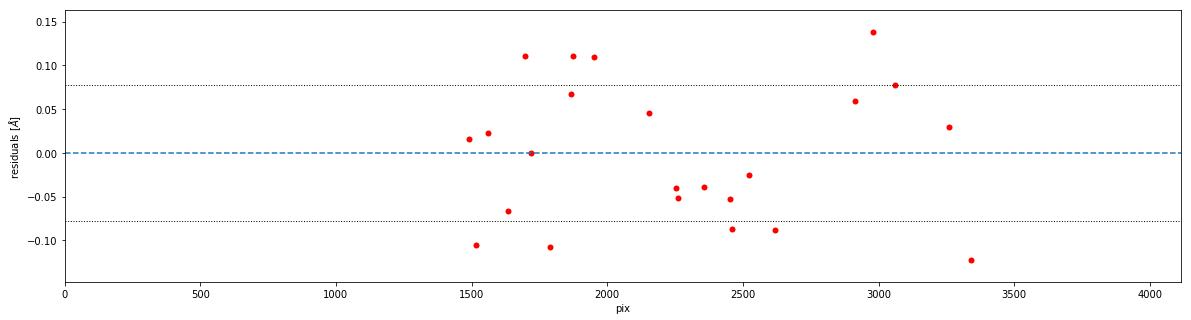

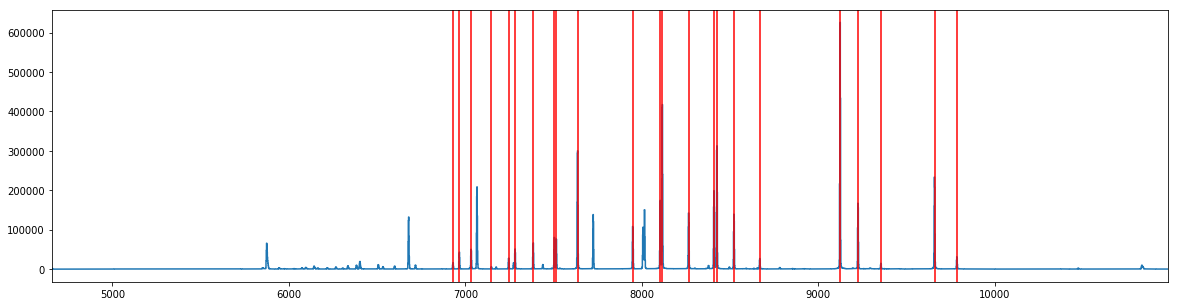

In [4]:
#generating more line matches based on guesses above and checking residuals to see if this is a good enough solution

ds_red10 = pipeline.goodness_of_matches(arcfiles_red10,guesses_red10,all_side_files_red10,atlasfiles_red10,linelist_red10,flatid)

# AnaK-2

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


3 target files located


choose 2D spec for redside
choose 1D target spec axis limits for redside


(-200, 1000)

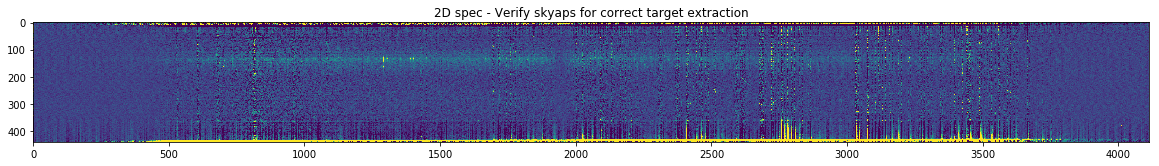

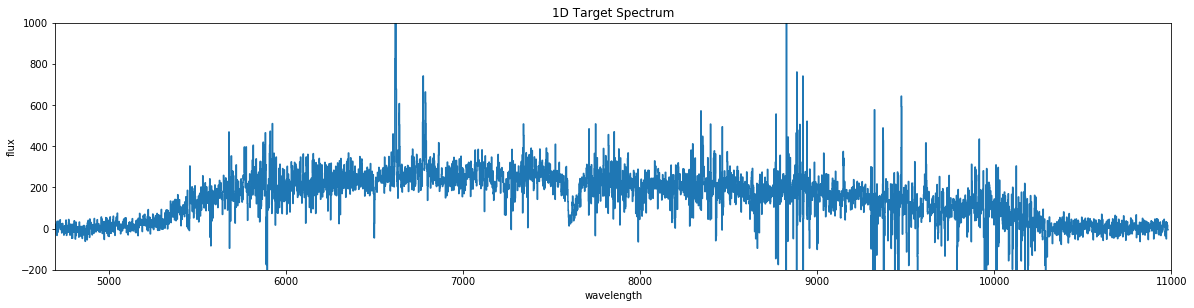

In [5]:
#1.0" frames 95-97
targetID_red10 = 'AnaK_2'
skyaps_red10 = [(50,100),(195,350)]
all_side_files_target='DoubleSpec/20151108/red*.fits'
flatid='DomeFlats 1p0'
specaps=(110,160) 
vmax=40
vmin=-10
model= ('poly',3)#'linear'
flux_red10_AK2,unc,comb = pipeline.sky_subtract(targetID_red10,skyaps_red10,ds_red10,all_side_files_red10,atlasfiles_red10,all_side_files_target,flatid,specaps,vmax,vmin,model)
plt.ylim(-200,1000)

# Starting 2nd reduction technique for rot.curves

## isolating h-alpha region (removed 2D from pipeline to play with)

In [6]:
#need this for 2d only extraction (pipeline modification)
def sky_subtract(comb,skyaps,model):    
    #plotting 2D to get skyaps right around the target
    plt.figure(figsize=(10,25)) #setting up fig size
    value = model[1]
    if model == 'linear':
        subimg, models = comb.subtract_sky(skyaps, skymodel=modeling.models.Linear1D(1,0)) #(1,0)
    elif model == ('poly',value):
        subimg, models = comb.subtract_sky(skyaps, skymodel=modeling.models.Polynomial1D(value)) #Linear1D(1/10,10)) #(1,0)
    elif model == ('combined',value):
        mymodel=(modeling.models.Polynomial1D(value) + modeling.models.Linear1D(1,0))
        subimg, models = comb.subtract_sky(skyaps, skymodel=mymodel)
    elif model == None:
        subimg, models = comb.subtract_sky(skyaps, skymodel=None)#subtracts mean
    else:
        print ("Model type or polynomial degree not recognized")
    return (subimg, comb, models)    #subtracted2D, original, fitted models per row

(1280, 1300)

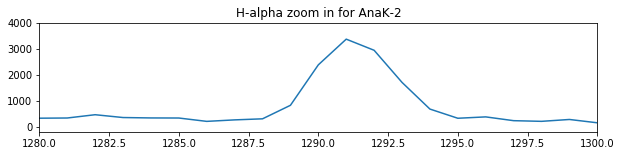

In [7]:
#quick spectral pix range estimate from 1D spectrum
plt.figure(figsize=(10,2))
plt.plot(flux_red10_AK2)
plt.title('H-alpha zoom in for AnaK-2')
plt.ylim(-200,4000)
plt.xlim(1280,1300) #1287-1295

#plt.ylim(-200,1000)
#plt.xlim(6600,6650)

In [8]:
#setup to extract 2D only (uses pipeline modification)


#stacking all those instrument-noise-subtracted target data files-help increase s/n 
atlasfiles = fits.open('henear.fits') #use for creating dispersion solution later 

#determing what instumentation noise is
flats = [reduce_dblspec.DoubleSpecImage(fn).overscan_sub_and_trim() for fn in 
          reduce_dblspec.find_all_obj(flatid,'DoubleSpec/20151108/red*.fits')[:10]] #DO I WANNA KEEP AS ONLY LAST 10???
nfl = reduce_dblspec.create_normalized_flat(flats)   
header = atlasfiles[0].header    
    
#locating all files w/ the target & instrumentation noise subtraction
specs = [reduce_dblspec.DoubleSpecImage(fn).overscan_sub_and_trim().flatten(nfl) 
          for fn in reduce_dblspec.find_all_obj(targetID_red10,all_side_files_target)]
#specs is the inst. noise subtracted group of files with data from target    
    
print("This is lenspecs:",len(specs))
comb = reduce_dblspec.combine_imgs(specs) #comb-all files data from target stacked
skyaps_red10 = [(50,100),(195,350)]
model=('poly',3)

subimg2, comb2, fitmodels = sky_subtract(comb,skyaps_red10,model)
#subimg2 is sky-subtracted, instumentation noise subtracted, 

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


This is lenspecs: 3


<Figure size 720x1800 with 0 Axes>

SPECTRAL H-alpha wl range in pix: 1289:1295;
SPACE Target spatial range in pix space: 105:195


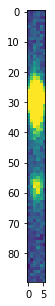

In [9]:
#2d ha region in pixels (from pipeline modification)

plt.figure(figsize=(5,5))
testingthis=subimg2.data[105:195,1289:1295] #[spatialrange,spectralrange]
#testingthis=subimg2.data[105:195,1238:1346] #a 50 wl wide section around Ha
#testingthis=subimg2.data[105:195,1278:1309] #finding wl range of Ha+NII/NIII lines
#[115:180]

bestline_range_fullccd = (1289,1295) #(1289, 1297)
bestline_range_correction = (1286,1292)#(1279,1287) #missing three

vmin=-10
vmax=45
plt.imshow(testingthis,vmin=vmin,vmax=vmax)
print('SPECTRAL H-alpha wl range in pix: 1289:1295;') #w/o missing 3 wl's , to use with flux data - 3
print('SPACE Target spatial range in pix space: 105:195')

## getting galaxy Spatial Core using full continuum

flux_data shape (91, 4111)
MISSING   3    STARTS    FROM    HERE !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


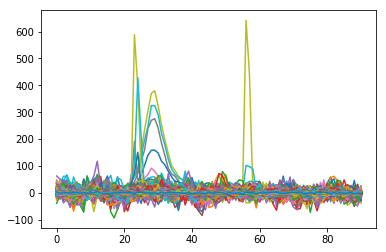

In [10]:
#getting gal core pix...PART ONE ##SPACE CORE

target_aperature=(105,195) #target location in space
target_wl_range=(1289,1295) #(bestline_range_fullccd[0],bestline_range_fullccd[1])

flux_data=[] #empty list to hold target 2d spec
apslc = np.arange(target_aperature[0],target_aperature[1]+1,1) #makes list for which rows to extracct spec from
#print (apslc) #as expected, +1 so doesnt cut off last value

#plt.plot(flux_red10_AK2[0:10])
#based on plot need to chop first 3 pixs due to osscialations 

#np.shape(subimg2.data)#(440, 4114)
for i in apslc:
    spec = subimg2.data[i]#subimg2 is sky-subtracted 2D spec #this is every row's spec...
    #plt.figure(figsize=(20,10))
    #plt.plot(spec)
    #print('first',np.shape(spec))
    #need to change if suming multiple pixel rows
    spec = spec[3::] #chops first 3 flux values in spectral (wl) direction-crazy osscillations
    flux_data.append(spec) #collects a list of every row's spec within the target location
flux_data=np.array(flux_data)
plt.plot(flux_data);
print('flux_data shape',np.shape(flux_data))
wl_pix_correction = 3
print('MISSING   3    STARTS    FROM    HERE !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')

shape (91, 1)
x: 34.32649813588809 y: 0.0 y is the spatial core location still in pixels & in the Reduced spectral range
to get full plate scale pix value add 105 and 3 from 1D spec cut due to oscillations
GALAXY CORE (based on entire red side plate scale) IS AT SPATIAL PIXEL: 139.32649813588807
SPACE_PIX_CORRECTION DEFINED HERE!!!!!!!


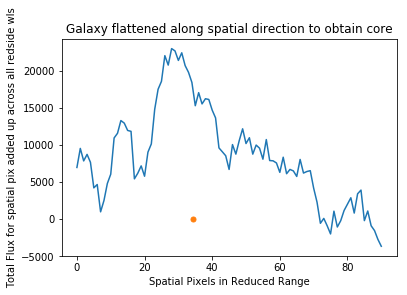

In [11]:
 #getting gal spatial core pix...PART TWO  ##SPACE CORE

#flattening to be along spatial direction (histogram like)
flux_array = np.sum(flux_data,axis=1) #explicitly making an array
flux_array2d = flux_array[:, np.newaxis] #need 2d for centroiding


print('shape',np.shape(flux_array2d))
x_galcore, y_galcore = centroid_com(flux_array2d) #actually doing the centroiding

#plotting
plt.plot(flux_array2d);
plt.plot(x_galcore, y_galcore ,'.',markersize=10)
plt.xlabel('Spatial Pixels in Reduced Range')
plt.ylabel('Total Flux for spatial pix added up across all redside wls')
plt.title('Galaxy flattened along spatial direction to obtain core')
space_pix_correction = target_aperature[0] 
spatial_core_pix = x_galcore + space_pix_correction #(adds 105 to correct from target extraction),(DONT need 3 from oscillations doesnt affect this b/c of spectral collapse in sum)

#conclusions
print('x:',x_galcore,'y:',y_galcore, 'y is the spatial core location still in pixels & in the Reduced spectral range')
print('to get full plate scale pix value add {:} and 3 from 1D spec cut due to oscillations'.format(target_aperature[0]))
print('GALAXY CORE (based on entire red side plate scale) IS AT SPATIAL PIXEL:',spatial_core_pix)
print('SPACE_PIX_CORRECTION DEFINED HERE!!!!!!!')


## getting galaxy Spatial Core using regions around Ha

(91, 4111)
shape of first section: (91, 10) matches shape of second section: (91, 10)
shape of first section 2d: (91, 1)
shape of second section 2d: (91, 1)
first section centroid x,y: 36.75856799267275 0.0
second section centroid x,y: 36.76871512227984 0.0
This is the average pixel value of the core BEFORE spatial cutout corrections 36.7636415574763
Pixel Value of core along spatial axis wrt full CCD size 141.7636415574763


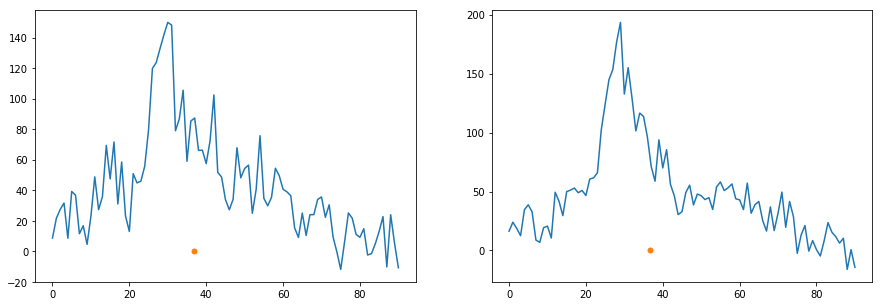

In [12]:
#USING SECTIONS SURROUNDING HALPHA WL RANGE
print(np.shape(flux_data))#(226,4111) #note that this is missing those 3 wl's
#also note flux_data is continuum subtracted

#below for reference
#harange_if10missing = flux_data[:,1386:1399] #flux_data off by 10 so subtract 10 from usual h-alpha's wl-in-pixspace range 
#plt.plot(harange_if10missing[11]); #saw clear ha peak so good

#making arrays surrounding h-alpha
upperha = bestline_range_correction[1]
lowerha = bestline_range_correction[0]
width_sections = 10 #to avoid strong N lines around Ha
upper_one = lowerha - 1 #just to give it some distance
lower_one = upper_one - width_sections
lower_two = upperha + 1 #needed more distance (near&below core H-alpha leaks into this range so IF change ha range then make this 5 a 1 )
upper_two = lower_two + width_sections
first_section = flux_data[:,lower_one:upper_one]
second_section = flux_data[:,lower_two:upper_two]
print('shape of first section:', np.shape(first_section), 'matches shape of second section:', np.shape(second_section))
#plt.plot(second_section[120]); #tried many diff row values for both sections here - satisified correct


#collapsing both sections in the spatial direction (histogram like)
first_section_sum = np.sum(first_section,axis=1) 
first_section2d = first_section_sum[:,np.newaxis] #2d required to centroid
second_section_sum = np.sum(second_section,axis=1)
second_section2d = second_section_sum[:,np.newaxis] #2d required to centroid
print('shape of first section 2d:', np.shape(first_section2d))
print('shape of second section 2d:', np.shape(second_section2d))


#does the centroiding
x_first, y_first = centroid_com(first_section2d)
x_second, y_second = centroid_com(second_section2d)
print('first section centroid x,y:',x_first,y_first)
print('second section centroid x,y:',x_second,y_second)



#verify by plots
f, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
ax1.plot(first_section2d);
ax2.plot(second_section2d);
#note below had to reverse xy centroids to visualize correctly, not sure why it inverted tho...
ax1.plot(x_first,y_first, '.', markersize=10)
ax2.plot(x_second,y_second, '.', markersize=10)

#averaging the two core values, the y's
core_array = np.array([x_first,x_second])
core_avgcentroids = np.mean(core_array)
print('This is the average pixel value of the core BEFORE spatial cutout corrections',core_avgcentroids)

#corrections to pixel value of avg section core
core_from_sections = core_avgcentroids + space_pix_correction #corrects for spatial axis target cutout
print('Pixel Value of core along spatial axis wrt full CCD size',core_from_sections)



## Centroiding Halpha within target

In [13]:


#below for reference, uses full ccd wl range - first defined when applied DS
wl = np.array(ds_red10.pixtowl(np.arange(len(subimg2.data[::][0]))))
#print(len(subimg2.data[::][0]))
wl_shorter2 = wl[1285:1292] #isolate wl around h-alpha using full ccd plate wl range formerly 1387:1400
flux_data_short = flux_data[:,1285:1292]
#print(np.shape(new_short))
wl_pix_correction_wo_oscill = target_wl_range[0] - wl_pix_correction #wl_pix_correction is the oscillations

 
means_unc=[]
means=[]
print('should be blank',means)
stddev = []
gfit_vals = []
centroids_pix = []
mylist_ys2 = []
stddev =[]
holding2 = []
ha_wls2 = []
##below for reference- new is continuum subst target flux data (flux_data has 10 wl cut)
#concerned 10 wl cut means 10 flux cut too in the lenght of the data but cant decide
#if the 10 is already accounted for by +1387 or should also add into space_pix_correction2
#b/c that 10 cut cutout those wl's and corresponding fluxes
##new_short = new[:,1386:1399] #cut to isolate wl around h-alpha with 10 pix misisng b/c its continuum subt data not 2d full ccd

#gets halpha centroids in target gal's range
for row in flux_data_short: 
    #calculates centroids per row
    flux_fake2d2 = row[np.newaxis, :] #makes each row array into a fake2d
    #print('row?',flux_fake2d)
    centroid_ys, centroid_xs = centroid_com(flux_fake2d2)#finds center(x,y) of halpha for each row array
    #print(mylist4) #, mylist5)
    #holding_arr2 = row, wl_shorter2
    #xarr = np.array([row,wl_shorter2])
    mylist_ys2.append(centroid_ys)
    centroids_pix.append(centroid_xs) #collects all halpha centers/centroids per row
    
    #calculating errors per row via gaussian fit
    x = np.arange(len(row)) #ar(range(len(row)))
    y = row
    mean = centroid_xs
    g_init = models.Gaussian1D(amplitude=max(y), mean=mean, stddev=2.)
    fit_g = fitting.LevMarLSQFitter()
    gaussian = fit_g(g_init, x, y)
    #print('mean', gaussian.mean)
    means.append(gaussian.mean.value)
    gfit_vals.append(gaussian)
    stddev.append(gaussian.stddev.value) #
    
    #trying to get uncertainities per row via covariance matrix
    gaussian.param_cov = fit_g.fit_info['param_cov']
    #mytest = fit_g.fit_info['param_cov'][1][1]
    means_unc.append(fit_g.fit_info['param_cov']) #save the whole matrix and extract middle term via for loop below
    #means_unc.append(fit_g.fit_info['param_cov'][1][1]) #dont know why this doesnt work
    
 #end of for loop   
gfit_vals = np.array(gfit_vals) 
centroids_pix = np.array(centroids_pix)
print('lenght of means_unc is:', len(means_unc))
#print('means_unc type',type(means_unc),'means_unc', means_unc) #gaussian.param_cov)
gauss_stddev = np.array(stddev)
gaussian_means = np.array(means)
#mylist2=np.array(mylist2) #halpha centroids (wl) array
#print('mylist2:',mylist2)
#print('mean shape',np.shape(means),means)#,means, 'fixed THE PROBLEM!!!!!!!!!!!!!!!!!!!!!!')
gaussmax_specpix_fullccd = gaussian_means + stddev + wl_pix_correction + 1285 #not sure b/c +stddev would be max gauss val
gaussmeans_specpix_fullccd = gaussian_means + wl_pix_correction + 1285
centroid_specpix_fullccd = centroids_pix + wl_pix_correction + 1285 #1285 for spectral direction, 105 for spatial direction
target_spacepix_fullccd = np.arange(len(centroids_pix)) + space_pix_correction
#change above 1285 to automated value if 1286 works, otherwise think more



should be blank []


lenght of means_unc is: 91


(1285, 1299)

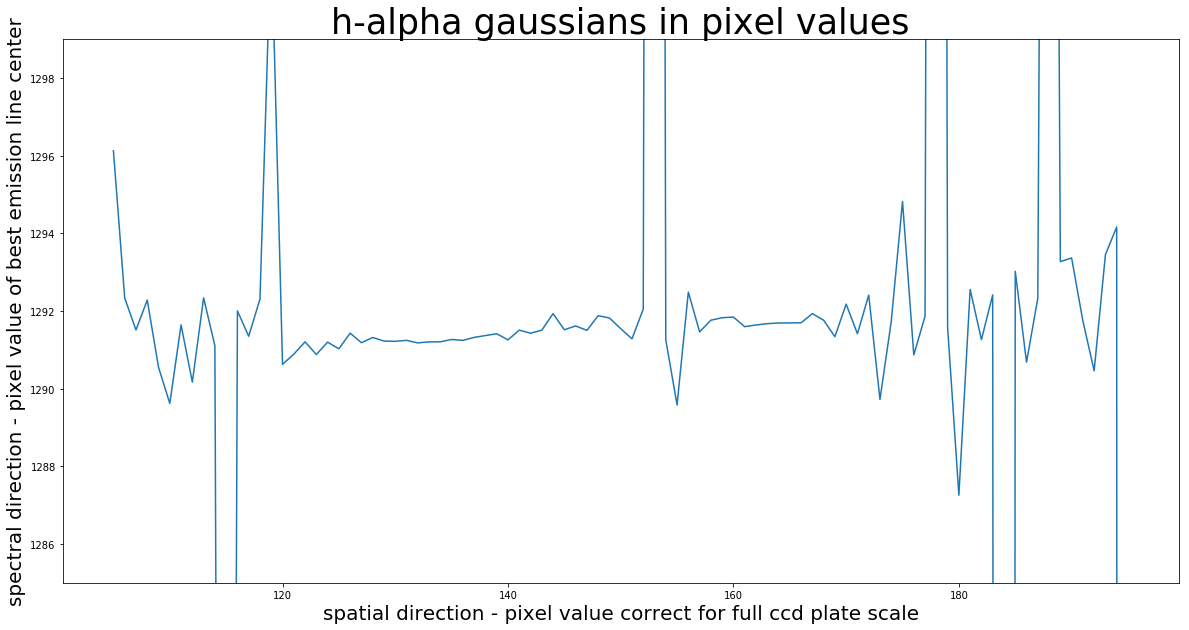

In [14]:
plt.figure(figsize=(20,10))
plt.xlabel("spatial direction - pixel value correct for full ccd plate scale",fontsize=20)
plt.ylabel('spectral direction - pixel value of best emission line center',fontsize=20)
plt.plot(target_spacepix_fullccd,gaussmeans_specpix_fullccd)#(spaital pix index,corrected "wl" of centroid values (still in pix space))
plt.title('h-alpha gaussians in pixel values',fontsize=35)
plt.ylim(1285,1299)

# Fixes Matrix

In [15]:
#helps me find a badmatrix index for use in below cell


# print('whole array type',type(means_unc))
# means_unc = np.array(means_unc)
# print('whole array new type', type(means_unc))
# print(means_unc[47:49])
# print('array 48 of means_unc type',type(means_unc[48]), 'array 48',means_unc[48])

# matrix = np.arange(0,len(means_unc),1)


# for i in matrix:
#     if np.any(means_unc[i]) == float:
#         print('results',i)

In [16]:
#takes out unc value from each matrix
#exploring means_unc problem/solution


# print('10',type(means_unc[10]))

# #determining which index of matrix value i want
# print(np.shape(means_unc), 'MATRIX', means_unc[1],'SECOND ROW', means_unc[1][1], 'MIDDLE',means_unc[1][1][1])
# print('possible problem matrix here',means_unc[10])

# #setting up indexing array to explore all the matrices in for loop
# matrix = np.arange(0,len(means_unc),1)
# print('matrix length array', matrix)


# badmatrix = np.array([ 0.0, 0.0, 0.0, 0.0, 100.0, 0.0, 0.0, 0.0, 0.0])
# badmatrix = np.reshape(badmatrix,(3,3))
# print('shape',np.shape(badmatrix),'middle index',badmatrix[1][1])

# unc = []
# uncs = [] 
# badvalues = []  
    
# for i in matrix:
#     #np.array([means_unc])
#     #empty == type(np.any(means_unc[10])) #np.bool
#     #print('empty',empty)
#     if np.any(means_unc[i]) == None:
#         print('bad matrix at array:',i)
#         badvalues.append(i)
#         for j in badvalues:
#             means_unc[j] = badmatrix
#             ##uncs.append(means_unc[j][1][1])
#             #print('one replaced uncs',uncs)
#             #print('replaced with', means_unc[j])
#             #print('right index?', means_unc[j][1][1])
#             #print('replaced type',type(means_unc[j]))
#     else:
#         np.all(means_unc[i]) == np.all(means_unc[i])
#         #print('reg type',type(means_unc[i]),'i=',i) #np.ndarray
#     uncs.append(means_unc[i][1][1]) #does same as below
#     #print('one original uncs',uncs)
    
# unc.append(uncs) #does same as above
# print('unc',np.shape(unc),len(unc),'uncs',np.shape(uncs),len(uncs))
# print('uncs best b/c of shape but unc or uncs are both same array of middle term from matrices....ie sigma**2')
# #print('unc len',len(unc),'unc shape',np.shape(unc),'unc',unc)

# #print("another row", 'MATRIX', means_unc[51],'SECOND ROW', means_unc[51][1], 'MIDDLE',means_unc[51][1][1])
# #print('maybe uncs is best',uncs,'shape',np.shape(uncs),'length',len(uncs))


In [17]:
#collecting indicies of bad matrices


matrix = np.arange(0,len(means_unc),1)
print('these should be the same, if not explore:',len(matrix),len(gaussian_means))

badindices = []
for i in matrix:
    #print()
    if np.any(means_unc[i]) == None:
        print('bad matrix at array:',i, means_unc[i])
        badindices.append(i)
    else:
        ok = 'ok'
        #print(ok)
        #print(means_unc[i])
print('number of bad fits is:',len(badindices))

these should be the same, if not explore: 91 91
bad matrix at array: 0 None
bad matrix at array: 10 None
bad matrix at array: 48 None
bad matrix at array: 73 None
bad matrix at array: 78 None
bad matrix at array: 79 None
bad matrix at array: 83 None
bad matrix at array: 89 None
number of bad fits is: 8


In [18]:
#masking bad uncertaiinty values


evenmore_badindices=[]
masked_gsigs_means=[]
for i in  range(len(means_unc)):
    #print(type(means_unc[i]))
    #if type(means_unc[i][1][1]) != np.ndarray:
    if type(means_unc[i]) == np.ndarray: #'NoneType':
        gmatrix_unc=means_unc[i][1][1]
        #print(i)
    #b/c these are the good fits, keep those vals
    else:
        gmatrix_unc=np.nan
        evenmore_bad = i
        evenmore_badindices.append(evenmore_bad)
        #print(i)
    #print(i, gmatrix_unc)
    masked_gsigs_means.append(gmatrix_unc)
evenmore_badindices = np.array(evenmore_badindices)
masked_gsigs_means = np.array(masked_gsigs_means)
#print(masked_gsigs_means)
print(evenmore_badindices,len(evenmore_badindices),badindices) #good they match, as they should

[ 0 10 48 73 78 79 83 89] 8 [0, 10, 48, 73, 78, 79, 83, 89]


In [19]:
#masking bad gaussian values
more2_badindices=[]
more_badindices=[]
masked_gaussian_means=[]
for i in  range(len(gaussian_means)):
    #b/c bad fit produced no cov matrix
    if i in badindices:
        gaussian_means[i] = np.nan
        #print('sdjbine09g8boernh589430gt9fjoiwenvg50348jgv')
    #b/c mean value shouldnt be outside this pixel range
    elif gaussian_means[i] <=0.0:
        gaussian_means[i]=np.nan
        more2_bads = i
        more2_badindices.append(more2_bads)
###############depends on width of h-alpha###################
    elif gaussian_means[i] >=8.0:
#############################################################
        gaussian_means[i] = np.nan
        more2_bads=i
        more2_badindices.append(more2_bads)
    #b/c these are the good fits, keep those vals
    else:
        gaussian_means[i]=gaussian_means[i]
    #print(i,gaussian_means[i])
    masked_gaussian_means.append(gaussian_means[i])
#more_badindices = np.array(more_badindices)
more2_badindices = np.array(more2_badindices)
masked_gaussian_means = np.array(masked_gaussian_means)



In [20]:
# changing those (evenmore bad indicies) values to nan in the uncertainity array


fullmask_sigma=[]
for i in  range(len(masked_gsigs_means)):
    #b/c bad fit produced no cov matrix
    if i in more2_badindices:
        masked_gsigs_means[i] = np.nan
    #b/c these are the good fits, keep those vals
    else:
        masked_gsigs_means[i]=masked_gsigs_means[i]
    #print(i,masked_gsigs_means[i])
    fullmask_sigma.append(masked_gsigs_means[i])
fullmask_sigma = np.array(fullmask_sigma)

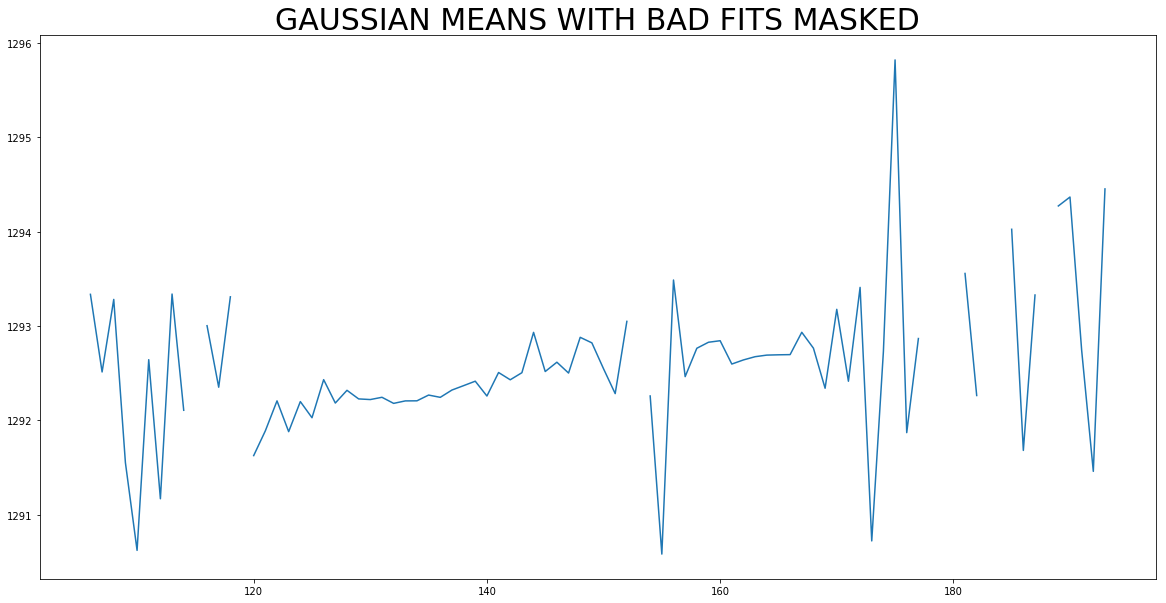

In [21]:
gaussmeans_specpix_fullccd_MASKED = masked_gaussian_means + wl_pix_correction + bestline_range_correction[0]
gaussmax_specpix_fullccd_MASKED = masked_gaussian_means + stddev + wl_pix_correction + bestline_range_correction[0]


plt.figure(figsize=(20,10))
plt.title('GAUSSIAN MEANS WITH BAD FITS MASKED',fontsize=30)
plt.plot(target_spacepix_fullccd,gaussmeans_specpix_fullccd_MASKED)

(1285, 1298)

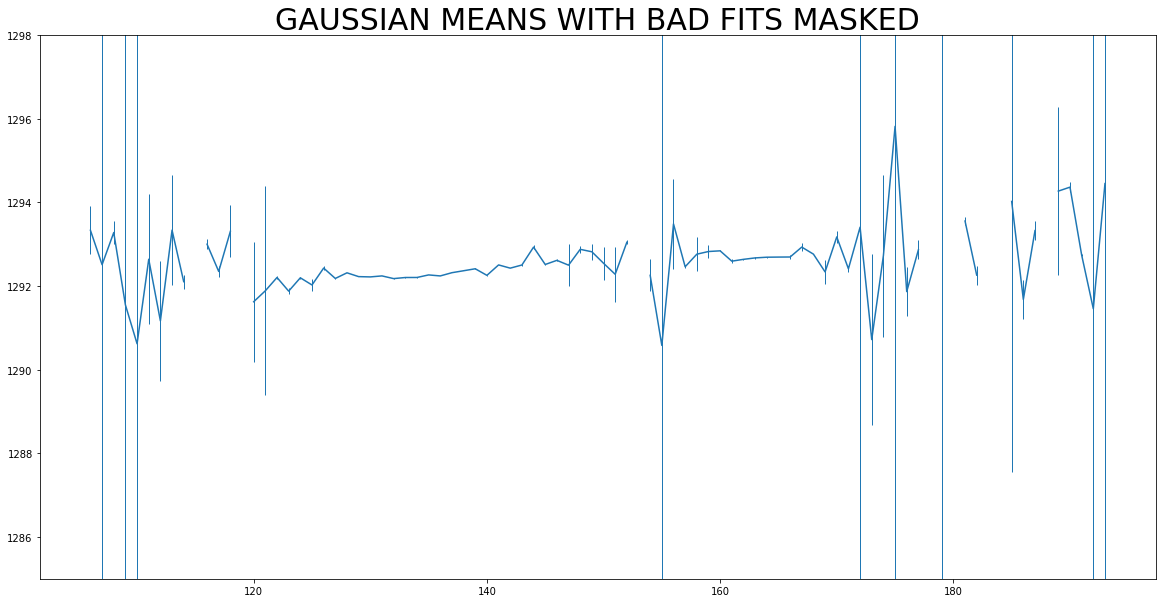

In [22]:
#with error bars


plt.figure(figsize=(20,10))
plt.title('GAUSSIAN MEANS WITH BAD FITS MASKED',fontsize=30)
plt.errorbar(target_spacepix_fullccd,gaussmeans_specpix_fullccd_MASKED,yerr=fullmask_sigma,capsize=0,elinewidth=1) #,alpha=0.5)
plt.ylim(1285,1298)

(1288, 1297)

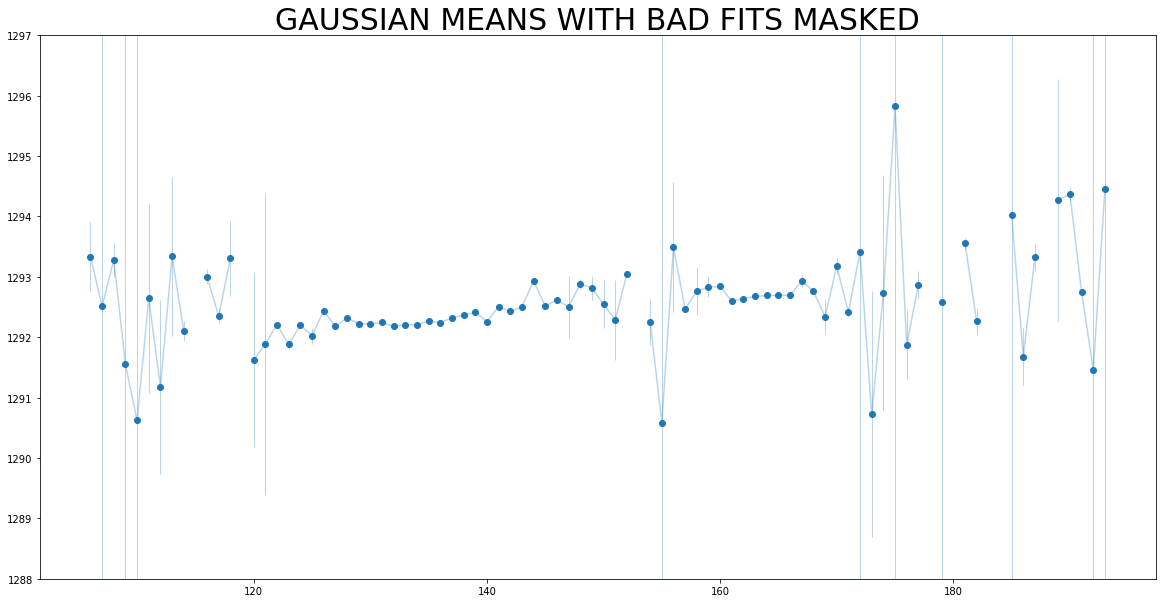

In [23]:
plt.figure(figsize=(20,10))
plt.title('GAUSSIAN MEANS WITH BAD FITS MASKED',fontsize=30)
plt.scatter(target_spacepix_fullccd,gaussmeans_specpix_fullccd_MASKED)
plt.errorbar(target_spacepix_fullccd,gaussmeans_specpix_fullccd_MASKED,yerr=fullmask_sigma,capsize=0,elinewidth=1,alpha=.3)
plt.ylim(1288,1297)

In [24]:
print(gaussmeans_specpix_fullccd_MASKED)

[          nan 1293.33482634 1292.51196928 1293.2810146  1291.55050537
 1290.62096843 1292.64224145 1291.16808196 1293.33806002 1292.10591377
           nan 1293.00226053 1292.35032162 1293.30859124           nan
 1291.6255436  1291.88810843 1292.20565564 1291.87934511 1292.19810771
 1292.02692682 1292.43047236 1292.18267535 1292.31751413 1292.22638768
 1292.21953784 1292.24357848 1292.17908914 1292.20525238 1292.20616651
 1292.26716241 1292.24302759 1292.32037974 1292.36696221 1292.41420626
 1292.25699124 1292.50621568 1292.4291863  1292.50419105 1292.93164992
 1292.51671171 1292.61546097 1292.50050815 1292.87921288 1292.82050053
 1292.54610389 1292.28246865 1293.04827785           nan 1292.25768427
 1290.58155392 1293.48666115 1292.46255874 1292.76313961 1292.82697468
 1292.84318036 1292.595945   1292.63967805 1292.67389739 1292.69067139
 1292.69385554 1292.69579883 1292.93260118 1292.76400486 1292.33932183
 1293.17593058 1292.41371426 1293.40849512 1290.72118295 1292.73006208
 1295.

# applys DS

(6616, 6628)

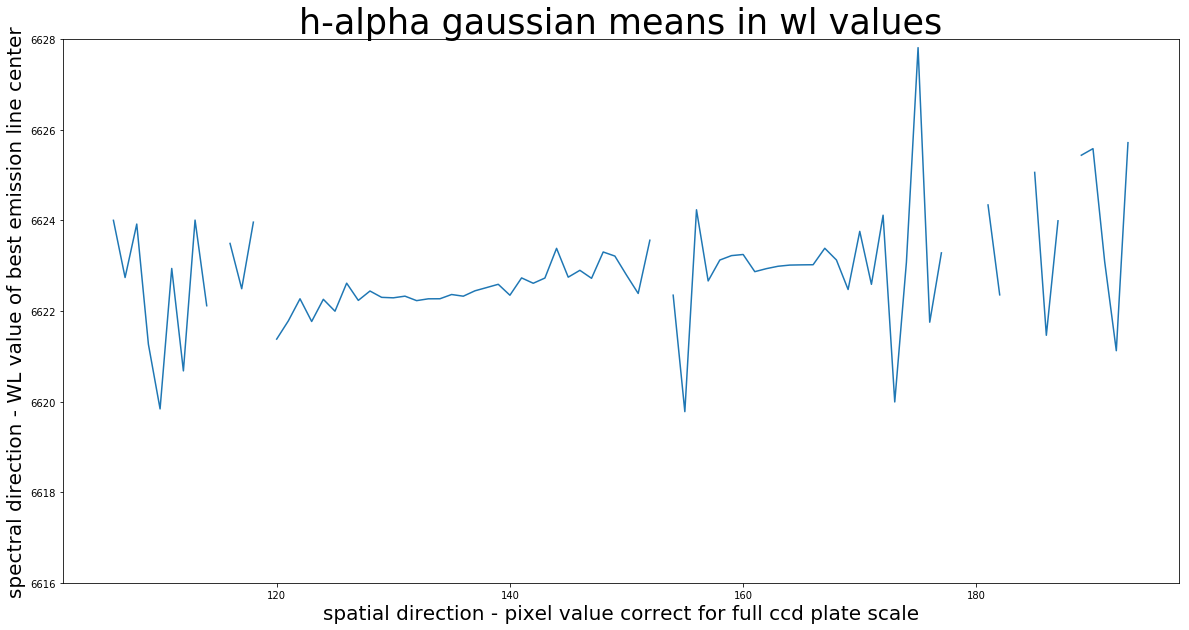

In [25]:
#applies ds


#gotta figure a way to keep masked values masked and not just add to a val from corrections
################################################################
wl_gaussians = np.array(ds_red10.pixtowl(gaussmeans_specpix_fullccd_MASKED))
#################################################################

#plotting
plt.figure(figsize=(20,10))
plt.xlabel("spatial direction - pixel value correct for full ccd plate scale",fontsize=20)
plt.ylabel('spectral direction - WL value of best emission line center',fontsize=20)
plt.plot(target_spacepix_fullccd,wl_gaussians)#(spaital pix index,corrected "wl" of centroid values (still in pix space))
##########################################################
plt.title('h-alpha gaussian means in wl values',fontsize=35)
##########################################################
#plt.ylim(6620,6625)
#plt.ylim(6600,6655)
plt.ylim(6616,6628)

# Getting Galaxy Spectral Core Pix

In [26]:
#NOTE THAT THIS CELL USES GAUSSIAN VALUES.....IF CENTROIDS HAVE BETTER FIT (less likely) CHANGE IT

#robust way to clean data (to avoid bad g fits)
#################################################################
cleaned_gaussmeans = sigma_clip(masked_gaussian_means, sigma=3)
################################################################
avg_of_gmeans = np.mean(cleaned_gaussmeans)

#correcting avg Ha wl pixel value to reflect its place on the full ccd scale
bestline_corewl_pix_fullccd = avg_of_gmeans + wl_pix_correction + bestline_range_correction[0]
print('pix value of halpha core spectral axis is:',bestline_corewl_pix_fullccd)

#applying ds to get pix to wl value
########################################################################
bestline_core_wl = ds_red10.pixtowl(bestline_corewl_pix_fullccd)*u.angstrom
#########################################################################

print('Best emission line "core" wl (based on gaussian fits) is:',bestline_core_wl)

pix value of halpha core spectral axis is: 1292.5298448867275
Best emission line "core" wl (based on gaussian fits) is: 6622.766847808607 Angstrom


In [27]:
#finding difference btwn bestline corewl above and average below

#print(masked_gaussian_means, cleaned_gaussmeans)
print('conclusion...cleaned_gaussmeans only has one more masked value than the bestline_core_wl')

conclusion...cleaned_gaussmeans only has one more masked value than the bestline_core_wl


In [28]:
wl_gauss_test = ds_red10.pixtowl(gaussmeans_specpix_fullccd_MASKED)*u.angstrom
wl_gaussians = np.array(ds_red10.pixtowl(gaussmeans_specpix_fullccd_MASKED))
average = np.nanmean(wl_gauss_test)
#print(wl_gauss_test,'thank you next',wl_gaussians,'average of the averaged',average)
print(average)


6622.829935013715 Angstrom


# Converting Pixels --> kpc

In [29]:
distance_pix_wrtcore_sections = target_spacepix_fullccd - core_from_sections #for core wl using 2 sections around best emission line

In [30]:
#actual converting for loop CENTROIDS pixels to kpc
## good for core defined by 2 sections around halpha

#converts pixels to kpc (distance profile)
arcmins_sections =[]
distances_sections=[]
more_sections = []


#converts pix to kpc and saves as quantity list
for i in distance_pix_wrtcore_sections:
    r_in_arcmin = 1*u.arcmin
    redplatescale = 0.293*u.arcsec/u.pixel
    blueplatescale = 0.389*u.arcsec/u.pixel
    dbsp_pix_equiv_red = u.pixel_scale(redplatescale)
    dbsp_pix_equiv_blue = u.pixel_scale(blueplatescale)
    r_in_pixel = i*u.pixel
    ################################################################
    r_in_arcmin = r_in_pixel.to('arcmin', dbsp_pix_equiv_red)
    distance = 34.8*u.Mpc # distance of object (host) from us
    ###############################################################
    rad_to_arcmin = (1*u.rad).to('arcmin')
    r_in_kpc = ((r_in_arcmin/rad_to_arcmin)*distance).to("kpc") #gets radians*distancefromus for gal width in kpc
    more_sections = r_in_kpc #/ (1*u.kpc)
    distances_sections.append(more_sections.value)
distances_sections = np.array(distances_sections)

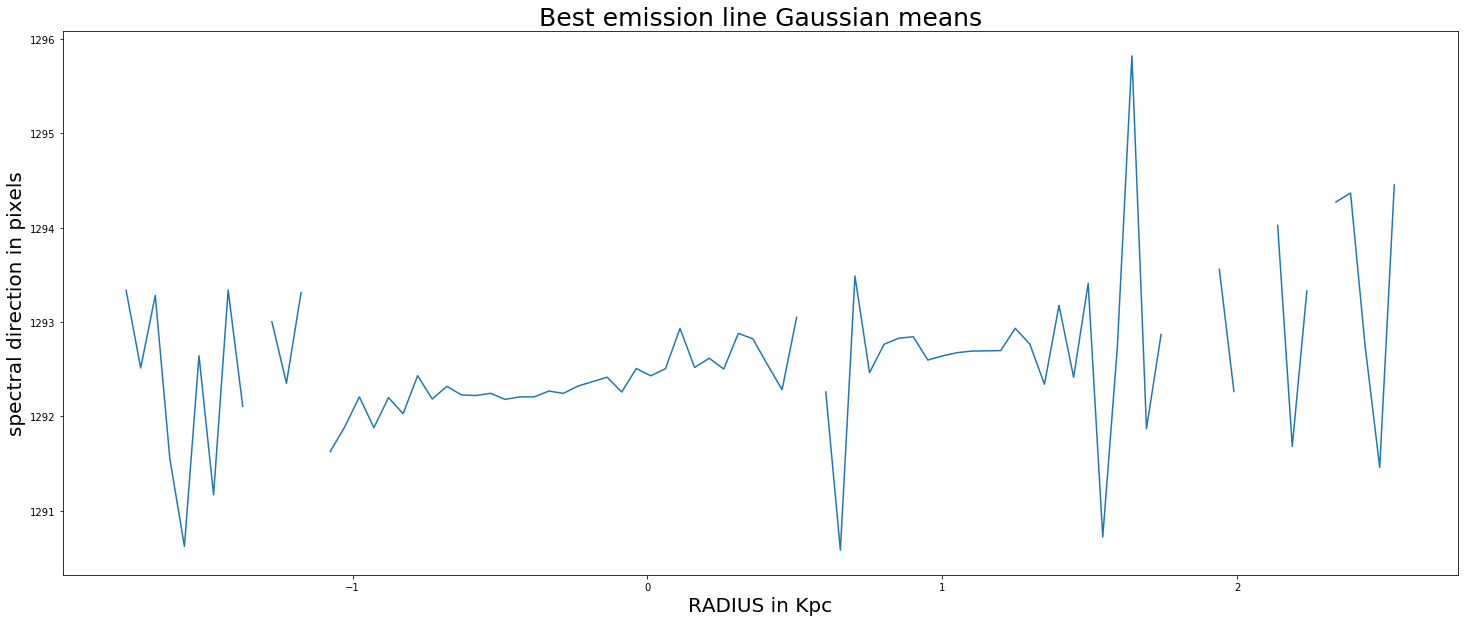

In [31]:
#GAUSSIAN MEANS plot with pix-wls & kpc

plt.figure(figsize=(25,10))
plt.title('Best emission line Gaussian means', SIZE=25)
plt.xlabel('RADIUS in Kpc',fontsize=20)
plt.ylabel('spectral direction in pixels',fontsize=20)
plt.plot(distances_sections * u.kpc, gaussmeans_specpix_fullccd_MASKED)

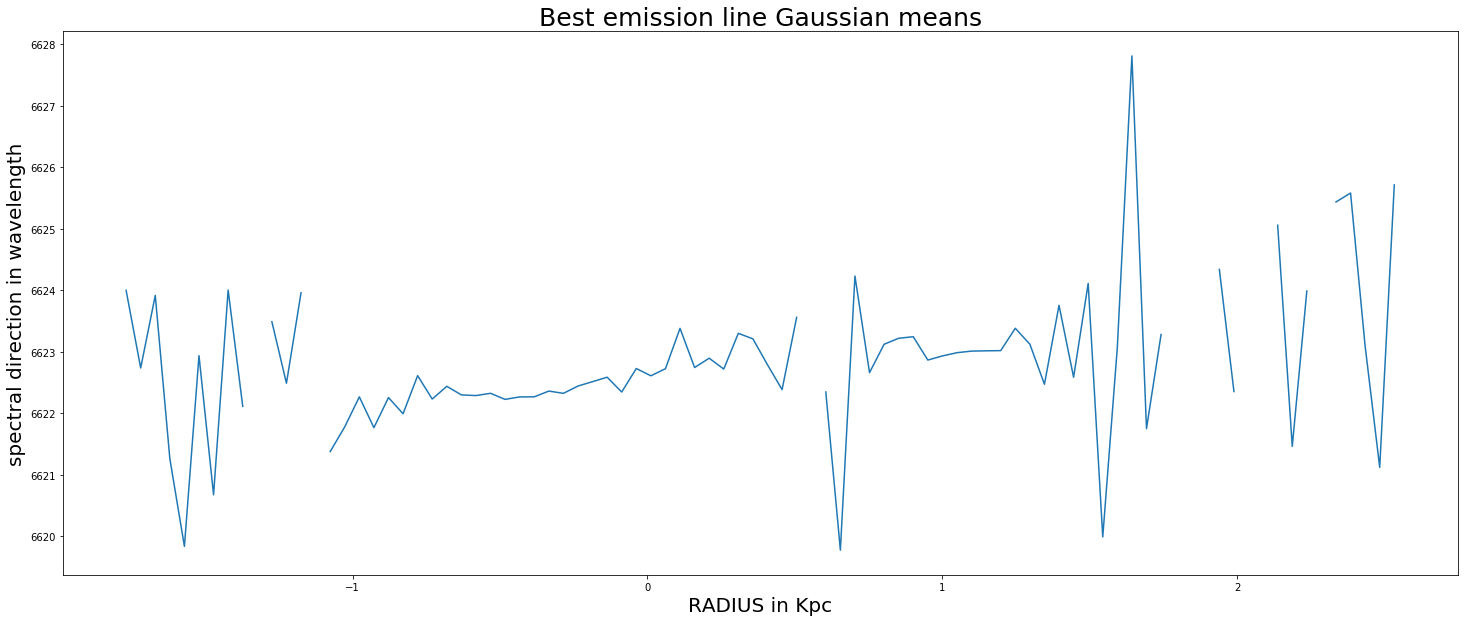

In [32]:
#GAUSSIAN MEANS plot with wl & kpc

plt.figure(figsize=(25,10))
plt.title('Best emission line Gaussian means', SIZE=25)
plt.xlabel('RADIUS in Kpc',fontsize=20)
plt.ylabel('spectral direction in wavelength',fontsize=20)
plt.plot(distances_sections * u.kpc, wl_gaussians)

In [33]:
### doesnt rely on distance from core



distances_sections_target=[]
more_sections_target = []

#converts pix to kpc and saves as quantity list
for i in target_spacepix_fullccd:
    r_in_arcmin = 1*u.arcmin
    redplatescale = 0.293*u.arcsec/u.pixel
    blueplatescale = 0.389*u.arcsec/u.pixel
    dbsp_pix_equiv_red = u.pixel_scale(redplatescale)
    dbsp_pix_equiv_blue = u.pixel_scale(blueplatescale)
    r_in_pixel = i*u.pixel
    ################################################################
    r_in_arcmin = r_in_pixel.to('arcmin', dbsp_pix_equiv_red)
    distance = 34.8*u.Mpc # distance of object (host) from us
    ###############################################################
    rad_to_arcmin = (1*u.rad).to('arcmin')
    r_in_kpc = ((r_in_arcmin/rad_to_arcmin)*distance).to("kpc") #gets radians*distancefromus for gal width in kpc
    more_sections_target = r_in_kpc #/ (1*u.kpc)
    distances_sections_target.append(more_sections_target.value)
distances_sections_target = np.array(distances_sections_target)

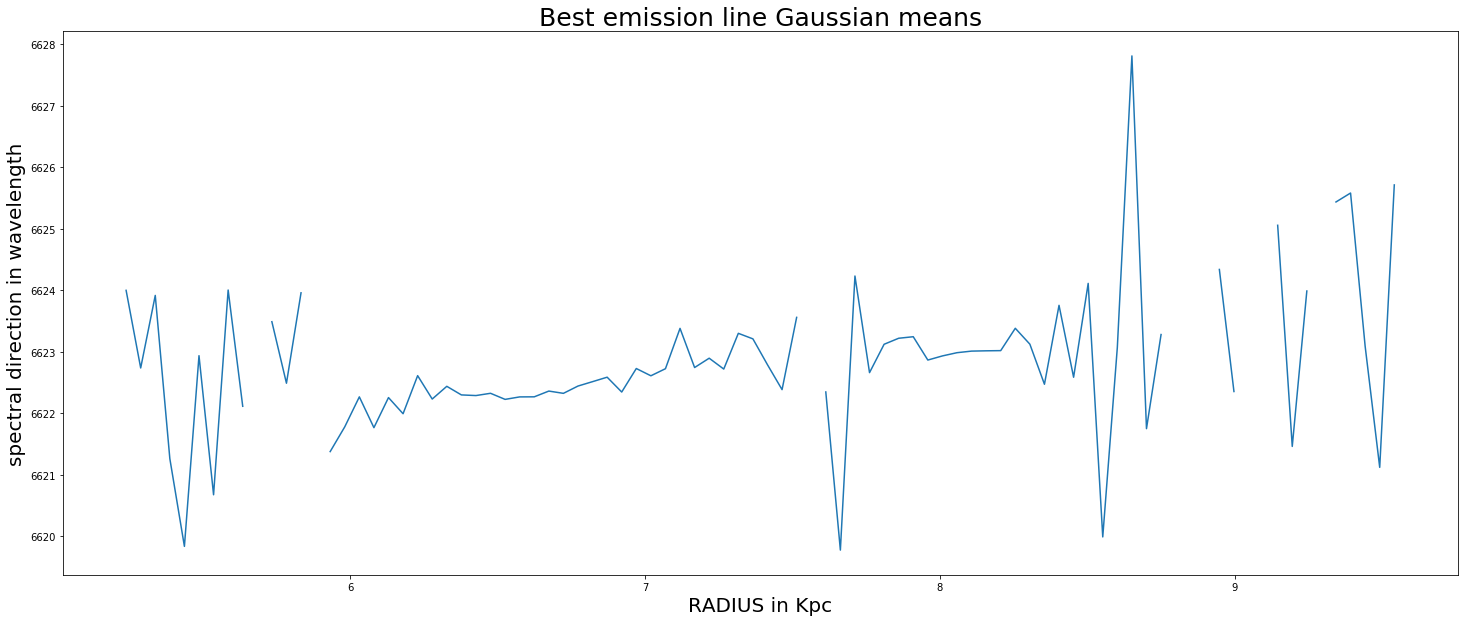

In [34]:
#GAUSSIAN MEANS plot with wl & kpc.....NO SPATIAL CORE from sections used

plt.figure(figsize=(25,10))
plt.title('Best emission line Gaussian means', SIZE=25)
plt.xlabel('RADIUS in Kpc',fontsize=20)
plt.ylabel('spectral direction in wavelength',fontsize=20)
plt.plot(distances_sections_target * u.kpc, wl_gaussians)

# Converting pix ---> wl -----> velocity

In [35]:
#convert pix to wl via ds
###################################################################
#centroids_wl = ds_red10.pixtowl(centroid_specpix_fullccd)*u.angstrom
gauss_meanWstd_wl  = ds_red10.pixtowl(gaussmax_specpix_fullccd_MASKED)*u.angstrom
gauss_means_wl = ds_red10.pixtowl(gaussmeans_specpix_fullccd_MASKED)*u.angstrom
#core_wl_sections = ds_red.pixtowl(core_from_sections)*u.angstrom
####################################################################

In [36]:
#using redshift formula to get velocity

#((obs_wl - true_wl)/true_wl)* c = velocity
#except what we want is  v_not relative to core - v_of core

#velocities NOT yet relative to the core
##############################################################################
v_spec_gaussians = ((gauss_means_wl/(6563*u.angstrom)) -1) * const.c #gaussian velocities
#v_spec_centroids = (centroids_wl /(6563*u.angstrom) -1) * const.c #centroid velocities
#v_core = ((bestline_core_wl/(6563*u.angstrom)) -1) * const.c #core velocity
v_core = ((average/(6563*u.angstrom)) -1) * const.c #core velocity


###############################################################################

#velocities relative to the core from sections
y_axis_Gvelocity = (v_spec_gaussians - v_core).to('km/s')  #gaussian
#y_axis_Cvelocity = (v_spec_centroids - v_core).to('km/s') #centroids

print("velocity of best emission line's spectral 'core':",v_core.to('km/s'))

velocity of best emission line's spectral 'core': 2732.982367780263 km / s


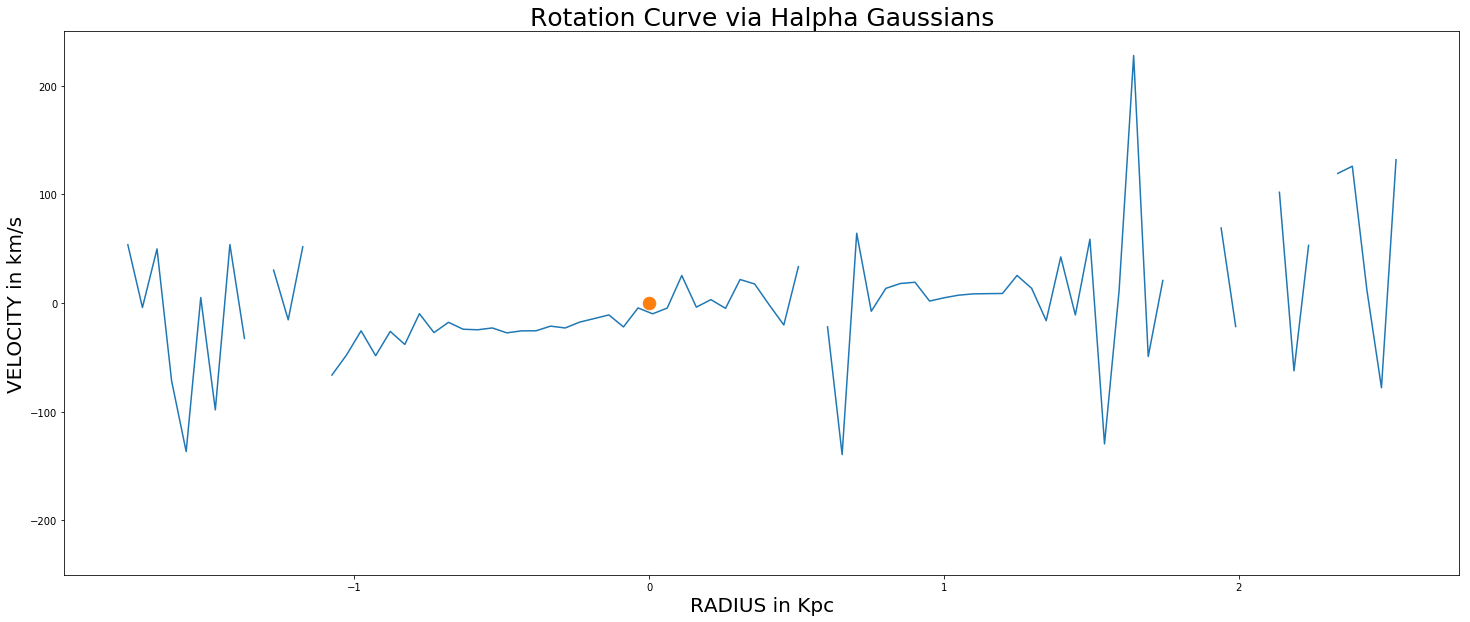

In [37]:
# used core from sections

plt.figure(figsize=(25,10))
#######################################################
plt.title('Rotation Curve via Halpha Gaussians', SIZE=25)
#######################################################
plt.xlabel('RADIUS in Kpc',fontsize=20)
plt.ylabel('VELOCITY in km/s',fontsize=20)
plt.plot(distances_sections * u.kpc, y_axis_Gvelocity)
plt.ylim(-250,250) #adjust as needed to center around zero
plt.plot(0,0,'.', markersize=25)

# error bars

In [38]:
#newer way trying to get core from eriks model

########################################### fullmask_sigma is in pixels
sigma_gauss_pix = np.sqrt(np.abs(fullmask_sigma)) #taking sqrt of unc to get a true sigma
################################################
#correct to full ccd pix scale
#print(sigma_gauss_pix)
means_Wsigma_fullccd = masked_gaussian_means + sigma_gauss_pix + wl_pix_correction + bestline_range_correction[0]
#apply ds
means_max_wl = ds_red10.pixtowl(means_Wsigma_fullccd)*u.angstrom


#making into velocities
v_means_withsigma = (means_max_wl/ (6563*u.angstrom)-1) * const.c #be sure to check all values ok (no inf)
#in converting pix2wl2vel section...already did same steps for means w/o sigma


#extracting sigma velocity
v_unc = (v_means_withsigma - v_spec_gaussians).to('km/s') 
#print(np.shape(v_unc))
#np.reshape(v_unc,(226,))
print('v_unc', np.shape(v_unc))#make sure its same length as y_axis_Gvelocitys_unc

v_unc (91,)


In [39]:
dist_kpc = distances_sections * u.kpc

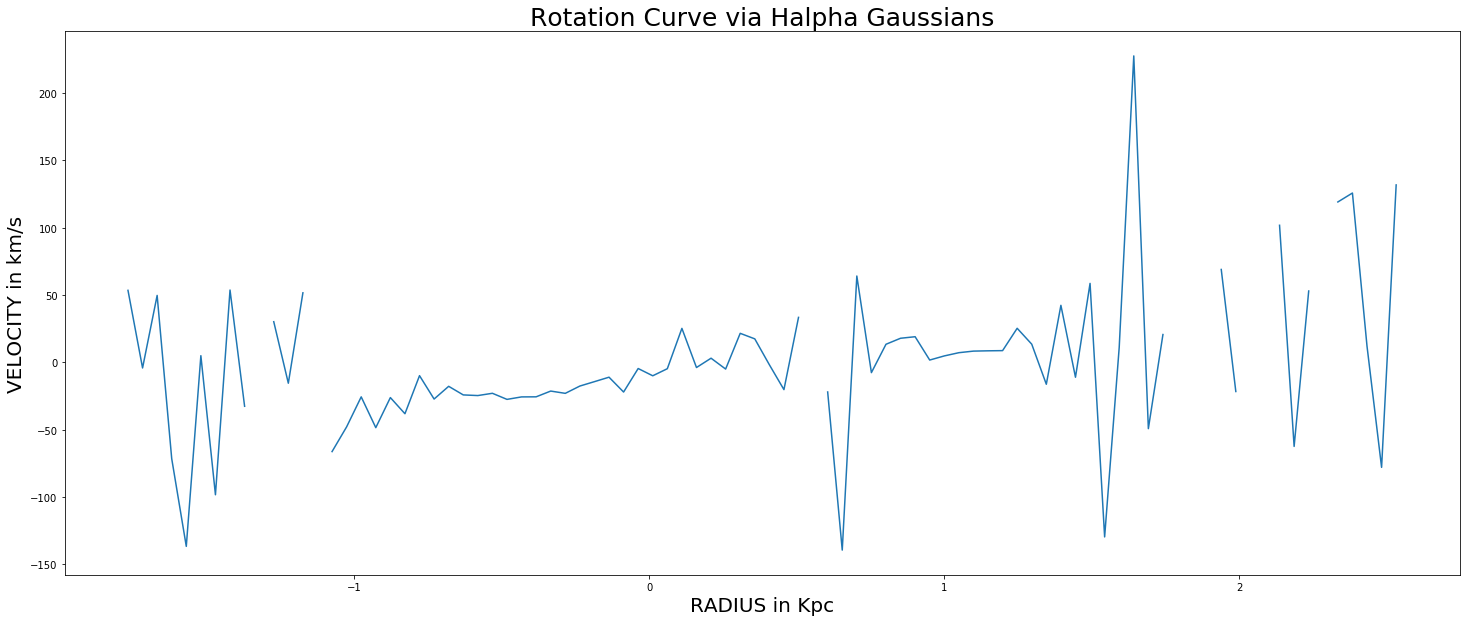

In [40]:
#checking whats wrong with below cell units----def the error bars

plt.figure(figsize=(25,10))
#######################################################
plt.title('Rotation Curve via Halpha Gaussians', SIZE=25)
#######################################################
plt.xlabel('RADIUS in Kpc',fontsize=20)
plt.ylabel('VELOCITY in km/s',fontsize=20)
plt.plot(np.asarray(dist_kpc), np.asarray(y_axis_Gvelocity))
#plt.ylim(-250,250) #adjust as needed to center around zero
#plt.plot(0,0,'.', markersize=25)

(-250, 250)

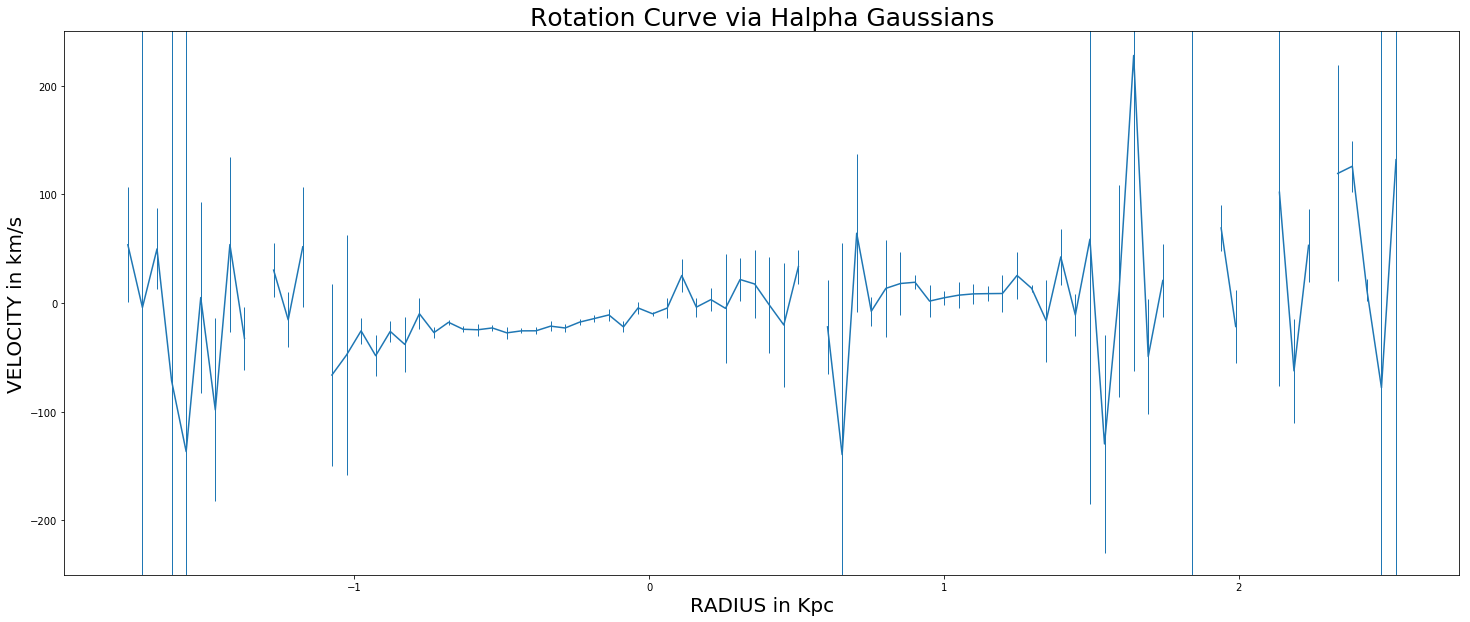

In [41]:
# WARNING -- why is one errorbar so huge? how did that get a fit, how not masked?
#also all arrays need to use np.asarray() to avoid unit error with errorbars

plt.figure(figsize=(25,10))
#######################################################
plt.title('Rotation Curve via Halpha Gaussians', SIZE=25)
#######################################################
plt.xlabel('RADIUS in Kpc',fontsize=20)
plt.ylabel('VELOCITY in km/s',fontsize=20)
plt.errorbar(np.asarray(dist_kpc), np.asarray(y_axis_Gvelocity),yerr=np.asarray(v_unc),elinewidth=1)
plt.ylim(-250,250) #adjust as needed to center around zero
#plt.plot(0,0,'.', markersize=25)

(-250, 250)

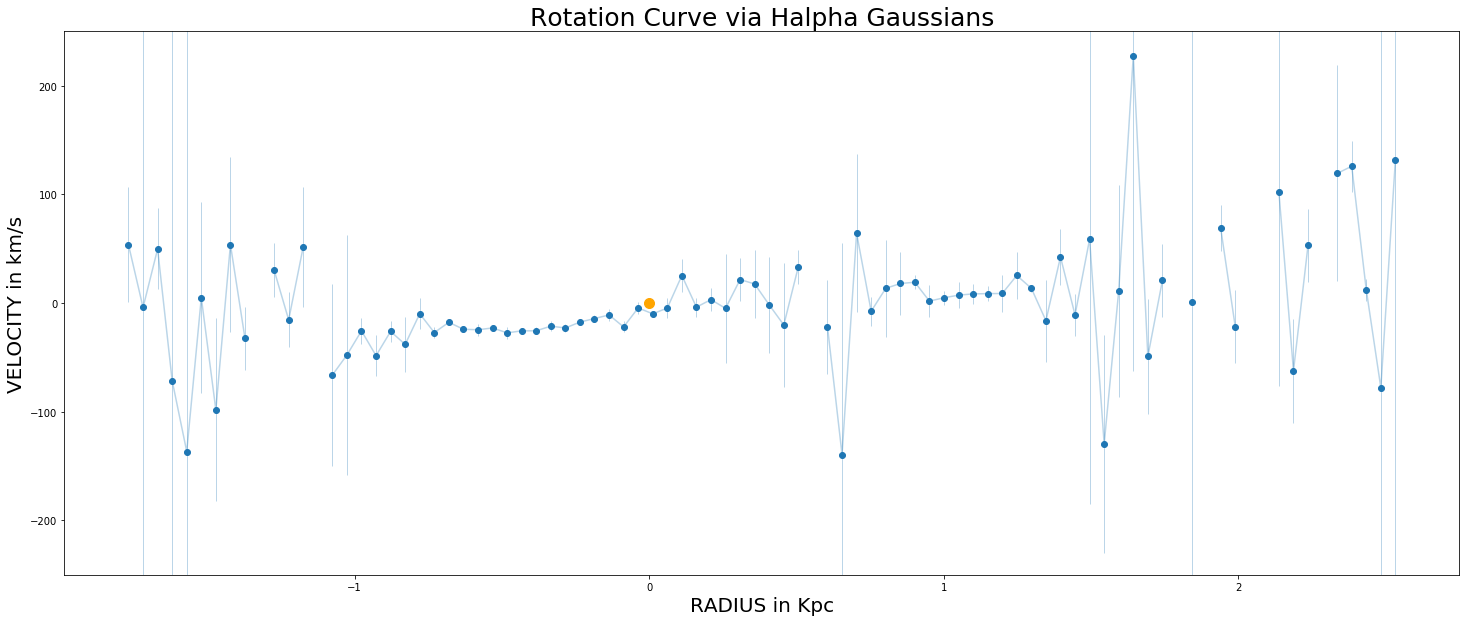

In [42]:
plt.figure(figsize=(25,10))
#######################################################
plt.title('Rotation Curve via Halpha Gaussians', SIZE=25)
#######################################################
plt.xlabel('RADIUS in Kpc',fontsize=20)
plt.ylabel('VELOCITY in km/s',fontsize=20)
plt.scatter(distances_sections * u.kpc, y_axis_Gvelocity)
plt.plot(0,0,'.', markersize=20,color='orange')
plt.errorbar(np.asarray(distances_sections * u.kpc), np.asarray(y_axis_Gvelocity),yerr=np.asarray(v_unc),elinewidth=1,alpha=0.3)
plt.ylim(-250,250) #adjust as needed to center around zero
#plt.plot(0,0,'.', markersize=25)

# Mass Modeling

Model: eriksmodel
Inputs: ('r',)
Outputs: ('r',)
Model set size: 1
Parameters:
          alpha                beta              sigma             omega       
    ------------------ ------------------- ----------------- ------------------
    -60.84536111392762 -45.089358978069036 177.1882842485801 0.3747662730630878


Text(0.5,1,'first attempt, uses defaults')

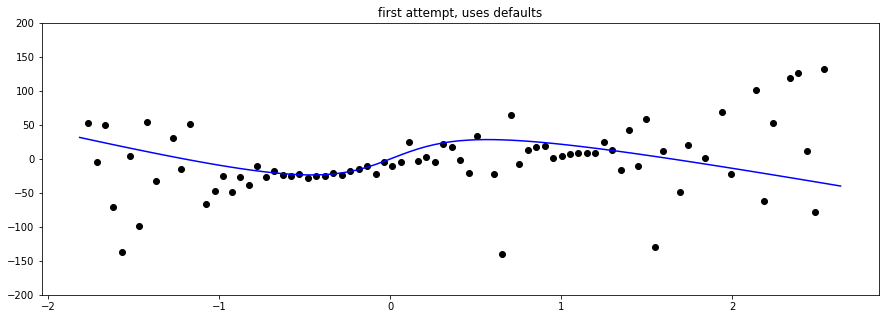

In [43]:
#uses core from sections - no bounds, no variation
#eriks model eqt 5



@models.custom_model #very necessary line
def eriksmodel(r, alpha=.000001, beta=.000001, sigma=-200, omega=.01):
    return (r * ((alpha + beta)/2) + (sigma - r*(alpha - beta)) * (np.arctan(r / omega))/np.pi)

arr=np.asarray

#fit model to data
m_init = eriksmodel()
fit = fitting.LevMarLSQFitter()
nan_msk = ~np.isnan(v_unc)
m = fit(m_init, arr(distances_sections)[nan_msk], arr(y_axis_Gvelocity.value)[nan_msk],weights=arr(1/(v_unc.value[nan_msk])**2))
print(m)
#plot data & fit
plt.figure(figsize=(15,5))
########################################################################
plt.scatter(distances_sections, y_axis_Gvelocity, color='k')
########################################################################
plt.plot(distances_sections, m(distances_sections), color='b')
plt.ylim(-200,200) #zooms to see data good, if fit is good
plt.title('first attempt, uses defaults')

Model: eriksmodel
Inputs: ('r',)
Outputs: ('r',)
Model set size: 1
Parameters:
    alpha  beta       sigma               omega       
    ----- ----- ------------------ -------------------
    1e-07 1e-07 52.278097068478694 0.14025882682212817


Text(0.5,1,'sets bounds on alpha/beta/sigma/omega')

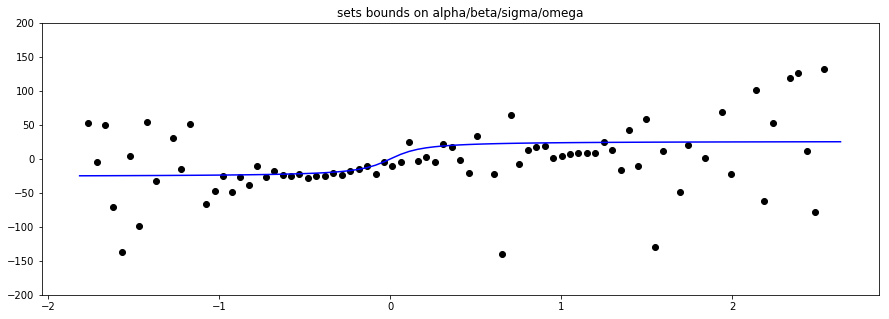

In [44]:
#sets bounds but still
#uses core from sections
#eriks model eqt 5



@models.custom_model #very necessary line
def eriksmodel(r, alpha=.000001, beta=.000001, sigma=20, omega=0.01):
    return (r * ((alpha + beta)/2) + (sigma - r*(alpha - beta)) * (np.arctan(r / omega))/np.pi)

arr=np.asarray

#fit model to data
#m_init = eriksmodel()
m_init = eriksmodel(bounds={'alpha':(.01,.0000001), 'beta':(.01,.0000001),'sigma': (-200,100),'omega':(0,10)})


fit = fitting.LevMarLSQFitter()
nan_msk = ~np.isnan(v_unc)
m = fit(m_init, arr(distances_sections)[nan_msk], arr(y_axis_Gvelocity.value)[nan_msk],weights=arr(1/(v_unc.value[nan_msk])**2))
print(m)
#plot data & fit
plt.figure(figsize=(15,5))
########################################################################
plt.scatter(distances_sections, y_axis_Gvelocity, color='k')
########################################################################
plt.plot(distances_sections, m(distances_sections), color='b')
plt.ylim(-200,200) #zooms to see data good, if fit is good
plt.title('sets bounds on alpha/beta/sigma/omega')

Model: eriksmodel
Inputs: ('r',)
Outputs: ('r',)
Model set size: 1
Parameters:
          r_cen       alpha  beta       sigma              omega       
    ----------------- ----- ----- ----------------- -------------------
    7.078051493601756 1e-07 1e-07 46.86036817405438 0.07487979914446705


Text(0.5,1,'lets R vary & sets bounds on r/alpha/beta/sigma/omega')

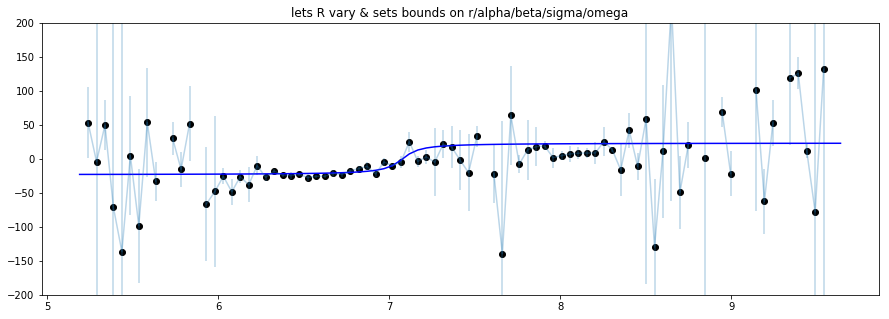

In [45]:
#lets r vary core location & uses bounds
#eriks model eqt 5



@models.custom_model #very necessary line
def eriksmodel(r, r_cen = 0,alpha=.000001, beta=.000001, sigma=20, omega=.01):
    dr = r-r_cen
    return (dr * ((alpha + beta)/2) + (sigma - dr*(alpha - beta)) * (np.arctan(dr / omega))/np.pi)

arr=np.asarray

#fit model to data
#m_init = eriksmodel()
m_init = eriksmodel(bounds={'r_cen': (6,8), 'alpha':(.01,.0000001), 'beta':(.01,.0000001),'sigma': (-200,100),'omega':(0,10)})
m_init.r_cen=7


fit = fitting.LevMarLSQFitter()
nan_msk = ~np.isnan(v_unc)
m = fit(m_init, arr(distances_sections_target)[nan_msk], arr(y_axis_Gvelocity.value)[nan_msk],weights=arr(1/(v_unc.value[nan_msk])**2))
print(m)
#plot data & fit
plt.figure(figsize=(15,5))
########################################################################
plt.scatter(distances_sections_target, y_axis_Gvelocity.value, color='k')
plt.errorbar(distances_sections_target,y_axis_Gvelocity.value,yerr = v_unc.value,alpha=.3)
########################################################################
plt.plot(distances_sections_target, m(distances_sections_target), color='b')
plt.ylim(-200,200) #zooms to see data good, if fit is good
plt.title('lets R vary & sets bounds on r/alpha/beta/sigma/omega')

<eriksmodel3(r_cen=6.71933961, alpha=-30.96590525, beta=17.20677808, sigma=18.77933337, omega=0.06475709, v_offset=-22.11196829)>


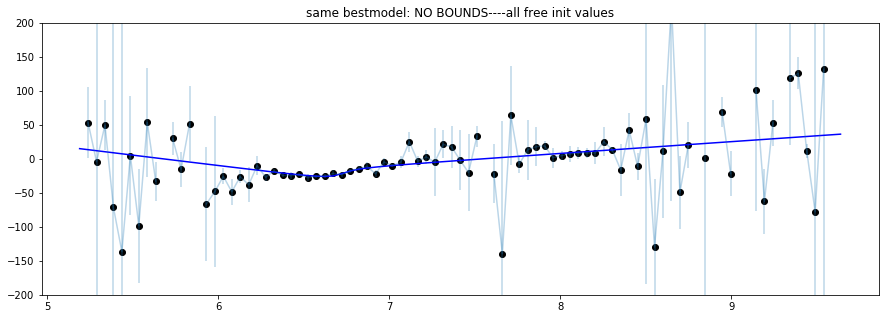

In [46]:
# fit without bounds but using the estimated values from best fit model


#adds v_offset & lets r vary core location & uses bounds
#eriks model eqt 5



@models.custom_model #very necessary line
def eriksmodel3(r, r_cen = 7.066195672148836,alpha=.0000001, beta=.0000001, sigma=39.07334316619813, omega=0.13096242377195882,v_offset=  -5.529132855503326):
    dr = r-r_cen
    return (dr * ((alpha + beta)/2) + (sigma - dr*(alpha - beta)) * (np.arctan(dr / omega))/np.pi) + v_offset

arr=np.asarray

#fit model to data
#m_init = eriksmodel()
m_init3 = eriksmodel3() #bounds={'r_cen': (6,8), 'alpha':(.01,.0000001), 'beta':(.01,.0000001),'sigma': (-200,100),'omega':(0,10)})
m_init.r_cen=7
# m_init.v_offset = mbest.v_offset.value
# m_init.sigma = mbest.sigma.value
# m_init.alpha = mbest.alpha.value
# m_init.beta = mbest.beta.value
# m_init.omega = mbest.omega.value

fit3 = fitting.LevMarLSQFitter()
nan_msk = ~np.isnan(v_unc)
m3 = fit3(m_init3, arr(distances_sections_target)[nan_msk], arr(y_axis_Gvelocity.value)[nan_msk],weights=arr(1/(v_unc.value[nan_msk])**2))
print(repr(m3))
#plot data & fit
plt.figure(figsize=(15,5))
########################################################################
plt.scatter(distances_sections_target, y_axis_Gvelocity.value, color='k')
plt.errorbar(distances_sections_target,y_axis_Gvelocity.value,yerr = v_unc.value,alpha=.3)
########################################################################
plt.plot(distances_sections_target, m3(distances_sections_target), color='b')
plt.ylim(-200,200) #zooms to see data good, if fit is good
plt.title('same bestmodel: NO BOUNDS----all free init values');

In [47]:
print(fit3.fit_info['param_cov'])

None


# USE BELOW FOR FINAL FIT

<eriksmodel(r_cen=7.06619567, alpha=0.0000001, beta=0.0000001, sigma=39.07334317, omega=0.13096242, v_offset=-5.52913286)>
LOOKS LIKE THE BEST ONE


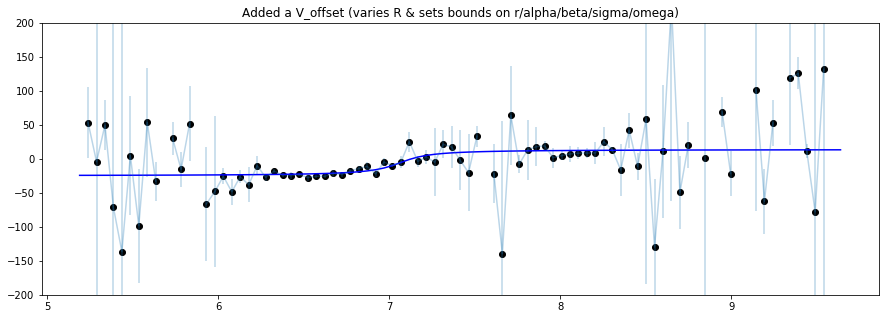

In [48]:
#adds v_offset & lets r vary core location & uses bounds
#eriks model eqt 5



@models.custom_model #very necessary line
def eriksmodel(r, r_cen = 0,alpha=.000001, beta=.000001, sigma=20, omega=.01,v_offset=0):
    dr = r-r_cen
    return (dr * ((alpha + beta)/2) + (sigma - dr*(alpha - beta)) * (np.arctan(dr / omega))/np.pi) + v_offset

arr=np.asarray

#fit model to data
#m_init = eriksmodel()
m_init = eriksmodel(bounds={'r_cen': (6,8), 'alpha':(.01,.0000001), 'beta':(.01,.0000001),'sigma': (-200,100),'omega':(0,10)})
m_init.r_cen=7


fit = fitting.LevMarLSQFitter()
nan_msk = ~np.isnan(v_unc)
mbest = fit(m_init, arr(distances_sections_target)[nan_msk], arr(y_axis_Gvelocity.value)[nan_msk],weights=arr(1/(v_unc.value[nan_msk])**2))
print(repr(mbest))
#plot data & fit
plt.figure(figsize=(15,5))
########################################################################
plt.scatter(distances_sections_target, y_axis_Gvelocity.value, color='k')
plt.errorbar(distances_sections_target,y_axis_Gvelocity.value,yerr = v_unc.value,alpha=.3)
########################################################################
plt.plot(distances_sections_target, mbest(distances_sections_target), color='b')
plt.ylim(-200,200) #zooms to see data good, if fit is good
# plt.ylim(-30,40)
# plt.axhline(-25)
# plt.axhline(39+ -25)
print('LOOKS LIKE THE BEST ONE')
plt.title('Added a V_offset (varies R & sets bounds on r/alpha/beta/sigma/omega)');

In [49]:
print(fit.fit_info['param_cov'])

None


# errorbars on model fit

In [50]:
# len(v_unc[nan_msk].value),len(v_unc.value[nan_msk]),v_unc.value[nan_msk]
# v_unc[nan_msk].value

In [51]:
#STEP 1  -- get distribution of each datapoint and name variables

#for analysis
xdata = arr(distances_sections_target)[nan_msk]
ydata_start = arr(y_axis_Gvelocity.value)[nan_msk] #.value to remove units
yerrdata = v_unc[nan_msk].value #.value to removve units
#for plots
ydata_units = y_axis_Gvelocity[nan_msk]
yerr_units = v_unc[nan_msk]



print(len(xdata),len(ydata_start),len(yerrdata))#,len(ydata_final))

# create random value (from gauss distribution around datapt) to add to datapoint
normvals = [] #index per data value
ix = 0
for i in range(len(xdata)):
    npoints = 1000######len(xdata)
    ix +=1
    normdist = np.random.normal(ydata_start[i],abs(yerrdata[i]), npoints) #is yerrdata[i] sigma or std? - they are the same thing
    normvals.append(normdist)

### normvals is an array(len==lenofxdata) arrays(len==100) for each datapoint

80 80 80


In [52]:
#STEP 2 -- create bootstrap samples

sample_size = 1000 #generate 1000 new datasets
# final_xarrs = [] #always stays the same
final_yarrs = []
for val in range(sample_size): 
#     print(val)
    indices=[]
    for i in range(0,len(ydata_start)): #generate index for each datapoint
        indices.append(np.random.randint(0,1000))################(len(ydata_start)-1)))  #change 99 to (len(ydata_start)-1)
    #actually grabs the data based on those random points
    data_subset=xdata
    err_subset=[]

    for count,i in enumerate(indices):
#         print(count,i) #done with replacement
        mytest = normvals[count][i]
        err_subset.append(mytest)
    final_yarrs.append(err_subset)
np.shape(final_yarrs)

(1000, 80)

In [53]:
#potentially keep
# generate 1000 new datasets - this should replace above 2 steps (except variable rename)
data_matrix = []
for index in range(len(ydata_start)):
    data_matrix.append([np.random.normal(ydata_start[index], abs(yerrdata[index])) for i in range(1000)])
data_matrix = np.array(data_matrix).T
np.shape(data_matrix),type(data_matrix)

((1000, 80), numpy.ndarray)

(-300, 300)

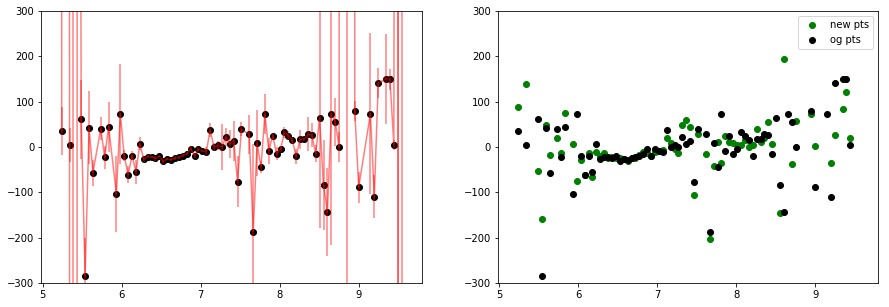

In [54]:
#tests
# len(ydata_units), len(yerr_units),len(ydata_start)

# # newdatapoints = np.array([np.random.normal(ydata_start, yerrdata) for i in range(1000)])
# # np.shape(newdatapoints)

index = 1
# test = [np.random.normal(ydata_start[index], yerrdata[index]) for i in range(1000)]
f, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
# ax1.hist(data_matrix[index],10)
# ax1.set_title('new vals for point # {}'.format(index))
# print('test:',len(test),np.shape(test),'normvals:',np.shape(normvals))
# ax2.hist(normvals[index])
# ax2.axvline(normvals[index][indices][index],color='r',label='selected value')
# ax2.set_title('normvals for point # {}'.format(index))
# print(indices[index], normvals[index][indices][index])
ax1.errorbar(xdata,final_yarrs[index],yerr= yerrdata,color='red',alpha=.5);
ax1.scatter(xdata,final_yarrs[index],color='k',label='og pts')
ax1.set_ylim(-300,300)
ax2.scatter(xdata,data_matrix[index],color='green',label='new pts')
ax2.scatter(xdata,final_yarrs[index],color='k',label='og pts')
ax2.legend()
ax2.set_ylim(-300,300)

# data_matrix[index] == each new datapoint range of values BEFORE THE TRANSPOSE


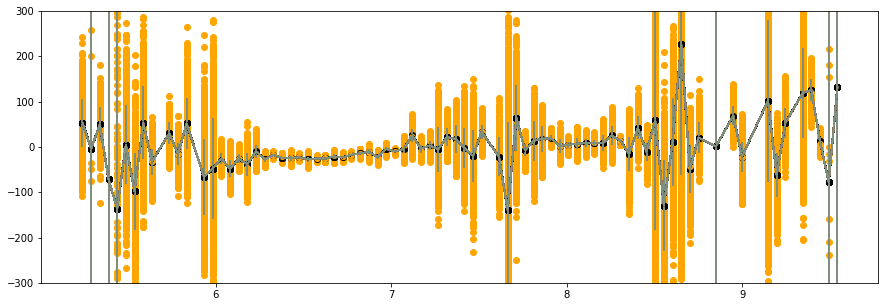

In [55]:
##STEP 3 --sanity check of new datasets


## plot all new datasets to see if scatter scales with errbars
plt.figure(figsize=(15,5))
for i in range(len(final_yarrs)):
    ###################################match names from best fit############################################
    plt.scatter(xdata, ydata_units, color='k')
    plt.errorbar(xdata,ydata_units.value,yerr=yerr_units.value,alpha=.3)
    #########################################################################################################
#     plt.scatter(data_subset,final_yarrs[i], color='orange')
    plt.scatter(data_subset,data_matrix[i], color='orange')
#     plt.legend() #cant use unless set up to only show once in this loop
#     plt.ylim(-200,200)
    plt.ylim(-300,300)

## thats whats going on, need to mask the larger error areas to exclude from fits

In [56]:
## STEP 4  --fits models (diff init params,weights) to each new dataset


###### OG -uses original inputs for init params
# def model
@models.custom_model #very necessary line
def ogeriksmodel(r, r_cen = 0,alpha=.000001, beta=.000001, sigma=20, omega=.01,v_offset=0):
    dr = r-r_cen
    return (dr * ((alpha + beta)/2) + (sigma - dr*(alpha - beta)) * (np.arctan(dr / omega))/np.pi) + v_offset
model_og = ogeriksmodel(bounds={'r_cen': (6,8), 'alpha':(.01,.0000001), 'beta':(.01,.0000001),'sigma': (-200,100),'omega':(0,10)})
model_og.r_cen=7
#fit model to data in a loop
ogsigmas=[]
allogmodels=[]
for i in range(len(final_yarrs)):
    fit = fitting.LevMarLSQFitter()
    ogmodelfit = fit(model_og, data_subset, final_yarrs[i])
    allogmodels.append(ogmodelfit)
    ogsigmas.append(ogmodelfit.sigma.value)


###### REMIX -uses mbest for init params
# def model
@models.custom_model #very necessary line
def remixeriksmodel(r, r_cen=mbest.r_cen.value,alpha=mbest.alpha.value, beta=mbest.beta.value, sigma=mbest.sigma.value, omega=mbest.omega.value,v_offset=mbest.v_offset.value):#sigma=-200, omega=10
    dr = r-r_cen
    return (dr * ((alpha + beta)/2) + (sigma - dr*(alpha - beta)) * (np.arctan(dr / omega))/np.pi) + v_offset
model_wbest = remixeriksmodel(bounds={'r_cen': (6,8), 'alpha':(.01,.0000001), 'beta':(.01,.0000001),'sigma': (-200,100),'omega':(0,10)})
model_wbest.r_cen=7
#fit model to data in a loop
remixsigmas=[]
allremixmodels=[]
for i in range(len(final_yarrs)):
    fit2 = fitting.LevMarLSQFitter()
    remixmodelfit = fit2(model_wbest, data_subset, final_yarrs[i])
    allremixmodels.append(remixmodelfit)
    remixsigmas.append(remixmodelfit.sigma.value)

    
    
##### WEIGHTS -redoing each model's fits with weights this time
#fit model to data in a loop
allogmodels_weight =[]
ogsigmas_weight =[]
allremixmodels_weight =[]
remixsigmas_weight =[]
for i in range(len(final_yarrs)):
    fit3 = fitting.LevMarLSQFitter()
    #remix
    remixmodelfit_weight = fit3(model_wbest, data_subset, final_yarrs[i],weights=(1/(yerrdata)**2))
    allremixmodels_weight.append(remixmodelfit_weight)
    remixsigmas_weight.append(remixmodelfit_weight.sigma.value)
    #og
    ogmodelfit_weight = fit3(model_og, data_subset, final_yarrs[i],weights=(1/(yerrdata)**2))
    allogmodels_weight.append(ogmodelfit_weight)
    ogsigmas_weight.append(ogmodelfit_weight.sigma.value)
    

/Users/dee/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/Users/dee/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide


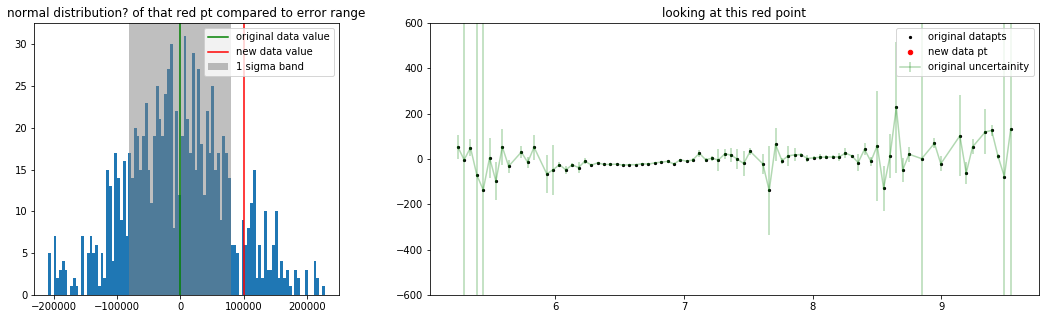

In [57]:
## Sanity check of new datapts wrt sigma range
# a test to see if new datapts lie within original errorbars


index = 1  # the index (of x-axis data) focusing on

singlept_dist = []
for count,alist in enumerate(final_yarrs):
    eachnewpt = alist[index]
    singlept_dist.append(eachnewpt)
    if count ==index:
        lookingat = alist[index]
    else:
        pass

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,5), gridspec_kw={'width_ratios': [1, 2]})
ax1.hist(singlept_dist,100) 
ax1.axvline(ydata_units.value[index],color='green',label='original data value')
ax1.axvline(final_yarrs[index][index],color='r',label='new data value')


maxval = ydata_units[index].value+abs(yerrdata[index])
minval = ydata_units[index].value-abs(yerrdata[index])
ax1.axvspan(minval,maxval,facecolor='0.5', alpha=0.5,label='1 sigma band')
ax1.set_title('normal distribution? of that red pt compared to error range')
ax1.legend();

ax2.scatter(xdata,ydata_units,color='k',s=5,label='original datapts')
ax2.errorbar(xdata,ydata_units.value, yerr=yerr_units.value,alpha=.3,color='green',label='original uncertainity')
ax2.scatter(data_subset[index], final_yarrs[index][index],s=20,color='red',label='new data pt')
ax2.set_title('looking at this red point')
ax2.set_ylim(-600,600)
ax2.legend();
# print(ydata_units[index],lookingat,final_yarrs[index][index],v_unc[nan_msk2][index].value)
# print(len(ydata_units),len(yerrdata))

/Users/dee/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/Users/dee/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide


this is model fits from 1000 new datasets


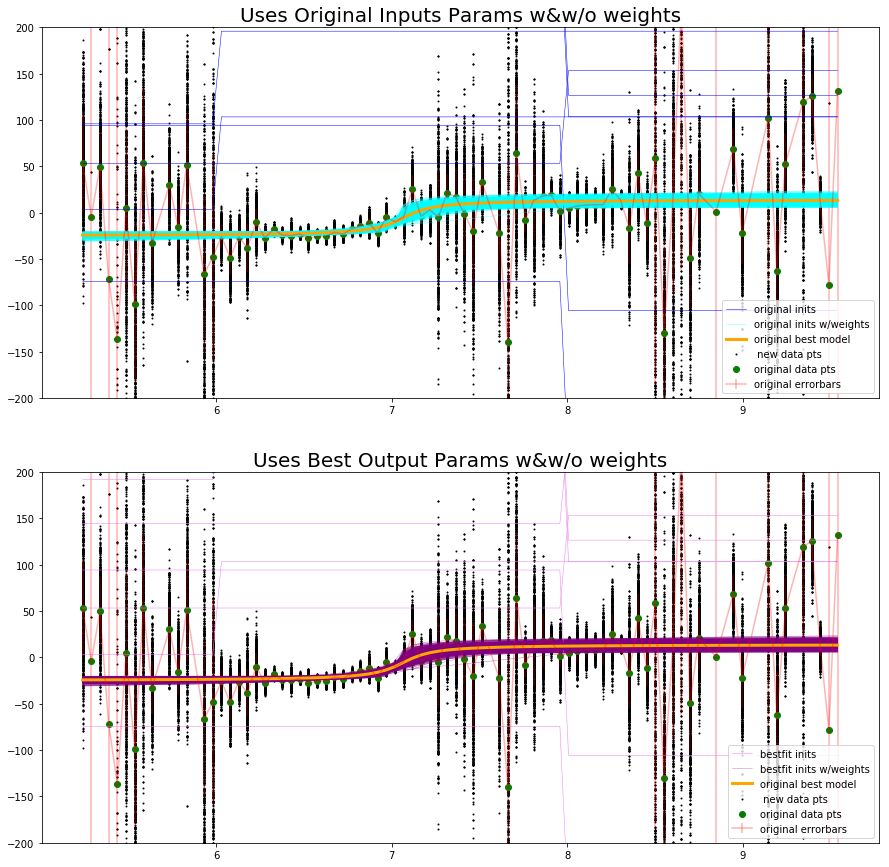

In [58]:
## STEP 5 -- plot model fits


## attempting to see many fits at once
# plt.figure(figsize=(15,5))
f, (ax1,ax2) = plt.subplots(2,1,figsize=(15,15))
for count in range(len(allogmodels)):
    colorval = count + 1 #b/c plt colors start at 1, no 0
    # conditional just to get one label for 100 new datasets
    if count == 0:
        ax1.plot(data_subset, allogmodels[count](data_subset), linewidth=.5,color='b',label='original inits') #OG
        ax2.plot(data_subset, allremixmodels[count](data_subset), linewidth=.5,color='violet',label='bestfit inits') #remix
        ax1.plot(data_subset, allogmodels_weight[count](data_subset), linewidth=.5,color='cyan',alpha=.5,label='original inits w/weights') #og-w
        ax2.plot(data_subset, allremixmodels_weight[count](data_subset), linewidth=.5,color='purple',alpha=.5,label='bestfit inits w/weights') #remix-w
        ax1.scatter(data_subset,final_yarrs[count],s=1, color='k',label=' new data pts')
        ax2.scatter(data_subset,final_yarrs[count],s=1, color='k',label=' new data pts')
    else:
        ax1.plot(data_subset, allogmodels[count](data_subset),linewidth=.5, color='b') #OG
        ax2.plot(data_subset, allremixmodels[count](data_subset), linewidth=.5,color='violet')#remix
        ax1.plot(data_subset, allogmodels_weight[count](data_subset), linewidth=.5,color='cyan',alpha=.5) #og-w
        ax2.plot(data_subset, allremixmodels_weight[count](data_subset), linewidth=.5,color='purple',alpha=.5)#remix-w
        ax1.scatter(data_subset,final_yarrs[count], s=1,color='k')#,linewidth=.2)
        ax2.scatter(data_subset,final_yarrs[count], s=1,color='k')#,linewidth=.2)
        
#####################################match names from best fit#########################################    
ax1.plot(xdata, mbest(xdata), linewidth = 3,color='orange',label='original best model')
ax1.errorbar(xdata,ydata_units.value, yerr=yerr_units.value,alpha=.3,color='red',label='original errorbars')
ax1.scatter(xdata, ydata_units,color='green',label='original data pts')

ax2.plot(xdata, mbest(xdata), linewidth = 3,color='orange',label='original best model')
ax2.errorbar(xdata,ydata_units.value, yerr=yerr_units.value,alpha=.3,color='red',label='original errorbars')
ax2.scatter(xdata, ydata_units,color='green',label='original data pts')
#########################################################################################################
ax1.legend()
ax2.legend()
ax1.set_title('Uses Original Inputs Params w&w/o weights',fontsize=20)
ax2.set_title('Uses Best Output Params w&w/o weights',fontsize=20)

ax1.set_ylim(-200,200);
ax2.set_ylim(-200,200); 
print('this is model fits from {} new datasets'.format(sample_size))

Do any of these sigma distributions look gaussian-like?


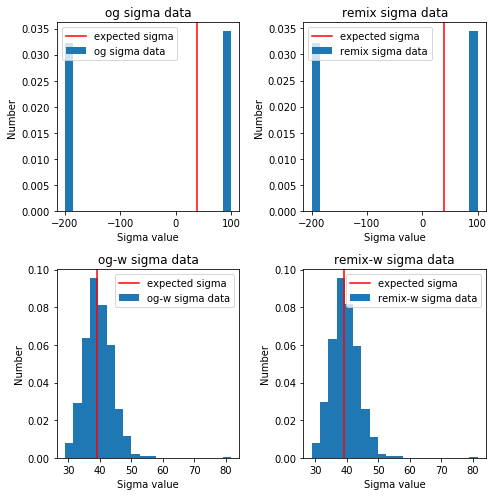

In [59]:
## STEP 6 --check sigmas for gaussian shape

f, ([ax1,ax2],[ax3,ax4]) = plt.subplots(2,2,figsize=(7,7))
extratick = [round(mbest.sigma.value,2)]
ax1.hist(ogsigmas, 20, density=True,label='og sigma data')
ax1.set_title('og sigma data')
ax3.hist(ogsigmas_weight, 20, density=True,label='og-w sigma data')
ax3.set_title('og-w sigma data')

ax2.hist(remixsigmas, 20, density=True,label='remix sigma data')
ax2.set_title('remix sigma data')
ax4.hist(remixsigmas_weight, 20, density=True,label='remix-w sigma data')
# ax4.set_xticklabels(list(ax4.xticks()[0]) + extratick)
ax4.set_title('remix-w sigma data')

axes = [ax1,ax2,ax3,ax4]
for i in axes:
    i.axvline(mbest.sigma.value,color='r',label='expected sigma')
    i.legend()
    i.set_ylabel('Number')
    i.set_xlabel('Sigma value');
f.tight_layout() 
print('Do any of these sigma distributions look gaussian-like?')

# extratick = [mbest.sigma.value]

In [60]:
# attempt at errorbar - not the best

# avg = np.mean(ogsigmas_weight)
# variance = (np.sum((ogsigmas_weight - avg)**2)) / len(ogsigmas_weight)
# onestd = np.sqrt(variance) #sigma
# onestd #3.9649019061021944 is close but use below

In [61]:
#STEP 7 - get error values on sigma param of best fit

#error bars based on sigma percentiles - the best
#pick most gaussian looking sig distribution ##ogsigmas,ogsigmas_weight, remixsigmas,remixsigmas_weight
best_sig_dist = np.abs(ogsigmas_weight)

median = np.percentile(best_sig_dist,50)
upper = np.percentile(best_sig_dist,84)
lower = np.percentile(best_sig_dist,16)
upperlim = upper - median
lowerlim = median - lower
sigma_error = [upperlim,lowerlim]
print('model fit error for sigma param = ',sigma_error)

##w/o np.abs(): model fit error for sigma param =  [4.247788290119274, 4.05160391305828]
## with np.abs(): model fit error for sigma param =  [4.310868559395189, 3.8669880244786654]
## using with abs for consistency but weird upper lim decreased- due to random int use?


model fit error for sigma param =  [4.310868559395189, 3.8669880244786654]


(16, 34, 50)

## older attempt below

In [61]:
throw error

SyntaxError: invalid syntax (<ipython-input-61-8ed0fe5dade6>, line 1)

In [ ]:
#STEP 1

# check data structure for how many subsets to take

xdata = arr(distances_sections_target)[nan_msk]
ydata_start = arr(y_axis_Gvelocity)[nan_msk].value #.value to remove units
#################################################################################
############# if used commented out got wrong sigmas centered around -94 with virtual no errors;
##### if use uncommented get decent values and gaussian like around correct sigma of -74
#################################################################################
yerrTEST = arr(v_unc)[nan_msk]#.value #.value to removve units
yerrdata =yerrTEST

print(len(xdata),len(ydata_start),len(yerrdata),len(yerrTEST))#,len(ydata_final))


# create random value (from gauss distribution around datapt) to add to datapoint
normvals = [] #index per data value
ix = 0
for i in range(len(xdata)):
    npoints = len(xdata)
    ix +=1
    #### WARNING: below had to make err abs b/c scale cant be negative but need to investigate how got a negative error to begin with --trace back variables- that may have been a bad fit that snuck through!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    normdist = np.random.normal(ydata_start[i],np.abs(yerrdata[i]), npoints) #is yerrdata[i] sigma or std? - they are the same thing
    normvals.append(normdist)

### normvals is an array(len==lenofxdata) arrays(len==100) for each datapoint

In [ ]:
#STEP 2

# GOOD create bootstrap sampling


# final_xarrs = [] #always stays the same
final_yarrs = []
for val in range(1000): #generate 1000 new datasets
#     print(val)
    indices=[]
    for i in range(0,len(ydata_start)): #change 100 to len(ydata_start)
        indices.append(np.random.randint(0,(len(ydata_start)-1)))  #change 99 to (len(ydata_start)-1)
    #actually grabs the data based on those random points
    data_subset=xdata
    err_subset=[]

    for count,i in enumerate(indices):
#         print(count,i) #done with replacement
        mytest = normvals[count][i]
        err_subset.append(mytest)
    final_yarrs.append(err_subset)
np.shape(final_yarrs)

In [ ]:
##STEP 3 --sanity check 


## plot all new datasets to see if scatter scales with errbars


# np.shape(data_subset),np.shape(err_subset),err_subset,data_subset
# for i in range(len(labels_subset)):
#     print(labels_subset[i])
#     break
plt.figure(figsize=(15,5))
for i in range(len(final_yarrs)):
    ###################################match names from best fit############################################
    plt.scatter(distances_sections_target[nan_msk], y_axis_Gvelocity[nan_msk].value, color='k')
    plt.errorbar(distances_sections_target[nan_msk],y_axis_Gvelocity[nan_msk].value,yerr=v_unc[nan_msk].value,alpha=.3)
    #########################################################################################################
    plt.scatter(data_subset,final_yarrs[i], color='orange')
    plt.ylim(-200,200)

#### USES ORIGINAL INPUT INIT PARAMS

In [ ]:
## STEP--4

# fit model for each sample
#og
# def model
@models.custom_model #very necessary line
def eriksmodel(r, r_cen = 0,alpha=.000001, beta=.000001, sigma=20, omega=.01,v_offset=0):
    dr = r-r_cen
    return (dr * ((alpha + beta)/2) + (sigma - dr*(alpha - beta)) * (np.arctan(dr / omega))/np.pi) + v_offset
m_init = eriksmodel(bounds={'r_cen': (6,8), 'alpha':(.01,.0000001), 'beta':(.01,.0000001),'sigma': (-200,100),'omega':(0,10)})
m_init.r_cen=7





sigmas=[]
allmodels=[]
#fit model to data in a loop
for i in range(len(final_yarrs)):
    fit = fitting.LevMarLSQFitter()
    modelfit = fit(model_init, data_subset, final_yarrs[i])
    allmodels.append(modelfit)
    sigmas.append(modelfit.sigma.value)
#   print(repr(modelfit))
print('This cell used eriksmodel with the same init params that started the original best fit')

In [ ]:
## STEP - 5
## sanity check -- used same init params that got og best fit

# sigmas #expected to be around -74 but these are around -91

## attempting to see many fits at once
plt.figure(figsize=(15,5))
for count,model in enumerate(allmodels):
    colorval = count + 1 #b/c plt colors start at 1, no 0
    # conditional just to get one label for 100 new datasets
    if count == 0:
        plt.plot(data_subset, model(data_subset), linewidth=.5,color='b',label='new fit models')
        plt.scatter(data_subset,final_yarrs[count],s=1, color='k',label=' new data pts')
    else:
        plt.plot(data_subset, model(data_subset),linewidth=.5, color='b')
        plt.scatter(data_subset,final_yarrs[count], s=1,color='k',linewidth=.2)
        
#####################################match names from best fit#########################################    
plt.plot(distances_sections_target[nan_msk], mbest(distances_sections_target[nan_msk]), linewidth = 3,color='orange',label='original best model')
plt.errorbar(distances_sections_target[nan_msk],y_axis_Gvelocity[nan_msk].value, yerr=v_unc[nan_msk].value,alpha=.3,color='red',label='original errorbars')
plt.scatter(distances_sections_target[nan_msk], y_axis_Gvelocity[nan_msk],color='green',label='original data pts')
#########################################################################################################
plt.legend()
plt.title('Comparing new distribution of model fits to the original best fit',fontsize=20)
plt.ylim(-200,200); 
print('this is model fits from 1000 new datasets')

In [ ]:
## STEP -6

#check if sigma distribution is gaussian -like

# plot sigma distribution
counts, bins, ignored = plt.hist(sigmas, 20, density=True,label='new sigma data')
plt.axvline(mbest.sigma.value,color='r',label='expected sigma')
extratick = [mbest.sigma.value]
plt.xticks(list(plt.xticks()[0]) + extratick,rotation=70)
plt.legend()
plt.ylabel('Number')
plt.title('Check if Sigma distribution is Gaussian-like')
plt.xlabel('Sigma value');
# print('Expected value of sigma from best fit:',mbest.sigma.value)
print('USES MODEL WITH INIT PARAMS THAT GOT OG BEST FIT')

#### USES OUTPUT BEST PARAMS

In [ ]:
# remix of above to see if diff init vals matter
# fit model for each sample

# def model
@models.custom_model #very necessary line
def eriksmodel(r, alpha=mbest.alpha.value, beta=mbest.beta.value, sigma=mbest.sigma.value, omega=mbest.omega.value,v_offset=mbest.v_offset.value):#sigma=-200, omega=10
    return (r * ((alpha + beta)/2) + (sigma - r*(alpha - beta)) * (np.arctan(r / omega))/np.pi)+v_offset
model_init = eriksmodel(bounds={'alpha':(.0000001,1), 'beta':(.0000001,1),'sigma': (-300,300),'omega':(0,100)})

sigmas2=[]
allmodels2=[]
#fit model to data in a loop
for i in range(len(final_yarrs)):
    fit = fitting.LevMarLSQFitter()
    modelfit2 = fit(model_init, data_subset, final_yarrs[i])
    allmodels2.append(modelfit2)
    sigmas2.append(modelfit2.sigma.value)
#   print(repr(modelfit))
print('This cell used eriks model with init params == the output best params from original best fit')

## old errorbar attempts below

In [ ]:
# # errrorbars ---free params best inits---didnt work


# #adds v_offset & lets r vary core location & uses bounds
# #eriks model eqt 5
# @models.custom_model #very necessary line
# def eriksmodel(r, r_cen = mbest.r_cen.value,alpha=mbest.alpha.value, beta=mbest.beta.value, sigma=mbest.sigma.value, omega=mbest.omega.value,v_offset=mbest.v_offset.value):
#     dr = r-r_cen
#     return (dr * ((alpha + beta)/2) + (sigma - dr*(alpha - beta)) * (np.arctan(dr / omega))/np.pi) + v_offset

# arr=np.asarray

# #fit model to data
# #m_init = eriksmodel()
# m_init = eriksmodel()#bounds={'r_cen': (6,8), 'alpha':(.01,.0000001), 'beta':(.01,.0000001),'sigma': (-200,100),'omega':(0,10)})
# # m_init.r_cen=7


# fit = fitting.LevMarLSQFitter()
# nan_msk = ~np.isnan(v_unc)
# m = fit(m_init, arr(distances_sections_target)[nan_msk], arr(y_axis_Gvelocity.value)[nan_msk],weights=arr(1/(v_unc.value[nan_msk])**2))
# print(repr(m))
# #plot data & fit
# plt.figure(figsize=(15,5))
# ########################################################################
# plt.scatter(distances_sections_target, y_axis_Gvelocity.value, color='k')
# plt.errorbar(distances_sections_target,y_axis_Gvelocity.value,yerr = v_unc.value,alpha=.3)
# ########################################################################
# plt.plot(distances_sections_target, m(distances_sections_target), color='b')
# plt.ylim(-200,200) #zooms to see data good, if fit is good
# # plt.ylim(-30,40)
# # plt.axhline(-25)
# # plt.axhline(39+ -25)
# print('LOOKS LIKE THE BEST ONE')
# plt.title('Added a V_offset (varies R & sets bounds on r/alpha/beta/sigma/omega)');

In [ ]:
# print(fit.fit_info['param_cov'])

In [ ]:
# # errrorbars ---forced params best inits---didnt work


# #adds v_offset & lets r vary core location & uses bounds
# #eriks model eqt 5
# @models.custom_model #very necessary line
# def eriksmodel(r, r_cen = mbest.r_cen.value,alpha=mbest.alpha.value, beta=mbest.beta.value, sigma=mbest.sigma.value, omega=mbest.omega.value,v_offset=mbest.v_offset.value):
#     dr = r-r_cen
#     return (dr * ((alpha + beta)/2) + (sigma - dr*(alpha - beta)) * (np.arctan(dr / omega))/np.pi) + v_offset

# arr=np.asarray

# #fit model to data
# #m_init = eriksmodel()
# m_init = eriksmodel()#bounds={'r_cen': (6,8), 'alpha':(.01,.0000001), 'beta':(.01,.0000001),'sigma': (-200,100),'omega':(0,10)})
# # m_init.r_cen=7
# m_init.r_cen = mbest.r_cen.value
# m_init.v_offset = mbest.v_offset.value
# m_init.sigma = mbest.sigma.value
# m_init.alpha = mbest.alpha.value
# m_init.beta = mbest.beta.value
# m_init.omega = mbest.omega.value



# fit = fitting.LevMarLSQFitter()
# nan_msk = ~np.isnan(v_unc)
# m = fit(m_init, arr(distances_sections_target)[nan_msk], arr(y_axis_Gvelocity.value)[nan_msk],weights=arr(1/(v_unc.value[nan_msk])**2))
# print(repr(m))
# #plot data & fit
# plt.figure(figsize=(15,5))
# ########################################################################
# plt.scatter(distances_sections_target, y_axis_Gvelocity.value, color='k')
# plt.errorbar(distances_sections_target,y_axis_Gvelocity.value,yerr = v_unc.value,alpha=.3)
# ########################################################################
# plt.plot(distances_sections_target, m(distances_sections_target), color='b')
# plt.ylim(-200,200) #zooms to see data good, if fit is good
# # plt.ylim(-30,40)
# # plt.axhline(-25)
# # plt.axhline(39+ -25)
# print('LOOKS LIKE THE BEST ONE')
# plt.title('Added a V_offset (varies R & sets bounds on r/alpha/beta/sigma/omega)');

In [ ]:
# print(fit.fit_info['param_cov'])

# old below here

In [ ]:
# # fit without bounds but using the estimated values from best fit model


# #adds v_offset & lets r vary core location & uses bounds
# #eriks model eqt 5



# @models.custom_model #very necessary line
# def eriksmodel(r, r_cen = mbest.r_cen.value,alpha=mbest.alpha.value, beta=mbest.beta.value, sigma=mbest.sigma.value, omega=mbest.omega.value,v_offset=mbest.v_offset.value):
#     dr = r-r_cen
#     return (dr * ((alpha + beta)/2) + (sigma - dr*(alpha - beta)) * (np.arctan(dr / omega))/np.pi) + v_offset

# arr=np.asarray

# #fit model to data
# #m_init = eriksmodel()
# m_init = eriksmodel() #bounds={'r_cen': (6,8), 'alpha':(.01,.0000001), 'beta':(.01,.0000001),'sigma': (-200,100),'omega':(0,10)})
# m_init.r_cen = mbest.r_cen.value
# m_init.v_offset = mbest.v_offset.value
# m_init.sigma = mbest.sigma.value
# m_init.alpha = mbest.alpha.value
# m_init.beta = mbest.beta.value
# m_init.omega = mbest.omega.value

# fit1 = fitting.LevMarLSQFitter()
# nan_msk = ~np.isnan(v_unc)
# m = fit1(m_init, arr(distances_sections_target)[nan_msk], arr(y_axis_Gvelocity.value)[nan_msk],weights=arr(1/(v_unc.value[nan_msk])**2))
# print(repr(m))
# #plot data & fit
# plt.figure(figsize=(15,5))
# ########################################################################
# plt.scatter(distances_sections_target, y_axis_Gvelocity.value, color='k')
# plt.errorbar(distances_sections_target,y_axis_Gvelocity.value,yerr = v_unc.value,alpha=.3)
# ########################################################################
# plt.plot(distances_sections_target, m(distances_sections_target), color='b')
# plt.ylim(-200,200) #zooms to see data good, if fit is good
# plt.title('same bestmodel: NO BOUNDS----forced init values');

In [ ]:
# print(fit1.fit_info['param_cov'])

In [ ]:
# # fit without bounds but using the estimated values from best fit model


# #adds v_offset & lets r vary core location & uses bounds
# #eriks model eqt 5



# @models.custom_model #very necessary line
# def eriksmodel(r, r_cen = mbest.r_cen.value,alpha=mbest.alpha.value, beta=mbest.beta.value, sigma=mbest.sigma.value, omega=mbest.omega.value,v_offset=mbest.v_offset.value):
#     dr = r-r_cen
#     return (dr * ((alpha + beta)/2) + (sigma - dr*(alpha - beta)) * (np.arctan(dr / omega))/np.pi) + v_offset

# arr=np.asarray

# #fit model to data
# #m_init = eriksmodel()
# m_init = eriksmodel() #bounds={'r_cen': (6,8), 'alpha':(.01,.0000001), 'beta':(.01,.0000001),'sigma': (-200,100),'omega':(0,10)})
# # m_init.r_cen=mbest.r_cen.value
# # m_init.v_offset = mbest.v_offset.value
# # m_init.sigma = mbest.sigma.value
# # m_init.alpha = mbest.alpha.value
# # m_init.beta = mbest.beta.value
# # m_init.omega = mbest.omega.value

# fit2 = fitting.LevMarLSQFitter()
# nan_msk = ~np.isnan(v_unc)
# m = fit2(m_init, arr(distances_sections_target)[nan_msk], arr(y_axis_Gvelocity.value)[nan_msk],weights=arr(1/(v_unc.value[nan_msk])**2))
# print(repr(m))
# #plot data & fit
# plt.figure(figsize=(15,5))
# ########################################################################
# plt.scatter(distances_sections_target, y_axis_Gvelocity.value, color='k')
# plt.errorbar(distances_sections_target,y_axis_Gvelocity.value,yerr = v_unc.value,alpha=.3)
# ########################################################################
# plt.plot(distances_sections_target, m(distances_sections_target), color='b')
# plt.ylim(-200,200) #zooms to see data good, if fit is good
# plt.title('same bestmodel: NO BOUNDS----all free init values');

In [ ]:
# print(fit2.fit_info['param_cov'])

In [ ]:
# # fit without bounds but using the estimated values from best fit model


# #adds v_offset & lets r vary core location & uses bounds
# #eriks model eqt 5



# @models.custom_model #very necessary line
# def eriksmodel3(r, r_cen = 7.066195672148836,alpha=.0000001, beta=.0000001, sigma=39.07334316619813, omega=0.13096242377195882,v_offset=  -5.529132855503326):
#     dr = r-r_cen
#     return (dr * ((alpha + beta)/2) + (sigma - dr*(alpha - beta)) * (np.arctan(dr / omega))/np.pi) + v_offset

# arr=np.asarray

# #fit model to data
# #m_init = eriksmodel()
# m_init3 = eriksmodel3() #bounds={'r_cen': (6,8), 'alpha':(.01,.0000001), 'beta':(.01,.0000001),'sigma': (-200,100),'omega':(0,10)})
# m_init.r_cen=7
# # m_init.v_offset = mbest.v_offset.value
# # m_init.sigma = mbest.sigma.value
# # m_init.alpha = mbest.alpha.value
# # m_init.beta = mbest.beta.value
# # m_init.omega = mbest.omega.value

# fit3 = fitting.LevMarLSQFitter()
# nan_msk = ~np.isnan(v_unc)
# m3 = fit3(m_init3, arr(distances_sections_target)[nan_msk], arr(y_axis_Gvelocity.value)[nan_msk],weights=arr(1/(v_unc.value[nan_msk])**2))
# print(repr(m3))
# #plot data & fit
# plt.figure(figsize=(15,5))
# ########################################################################
# plt.scatter(distances_sections_target, y_axis_Gvelocity.value, color='k')
# plt.errorbar(distances_sections_target,y_axis_Gvelocity.value,yerr = v_unc.value,alpha=.3)
# ########################################################################
# plt.plot(distances_sections_target, m3(distances_sections_target), color='b')
# plt.ylim(-200,200) #zooms to see data good, if fit is good
# plt.title('same bestmodel: NO BOUNDS----all free init values');

In [ ]:
# print(fit3.fit_info['param_cov'])

# 2D overlay

In [ ]:
# #in pixel space


# y_unc_pixs = means_Wsigma_fullccd - gaussmeans_specpix_fullccd_MASKED #needed errors in pixs
# subimg_fullccd =subimg2.data

# vmin=-10
# vmax=45
# plt.figure(figsize=(20,10))
# plt.imshow(subimg_fullccd.T,vmin=vmin,vmax=vmax)
# plt.ylabel('wl (in pix)')
# plt.xlabel('spatial pix')
# plt.scatter(target_spacepix_fullccd,gaussmeans_specpix_fullccd_MASKED, color='k')
# plt.errorbar(target_spacepix_fullccd, gaussmeans_specpix_fullccd_MASKED, yerr=y_unc_pixs,elinewidth=1,color='k')
# plt.ylabel('wl (in pix)')
# plt.xlabel('spatial pix')
# plt.ylim(1275,1309)
# #plt.ylim(1289,1296)
# plt.xlim(80,200)

# no below shift didnt work so the missing 3wlpixels isnt the thing causing the uptick...its something less than 3 pix - try a v_offset above

In [ ]:
# #test 1 of 2
# #trying to fix upshift - think forgot to use bestline_corrected ha range somewhere
 

# bestline_range_fullccd
# gaussmeans_specpix_fullccd_Masked_subtractedwlosc = gaussmeans_specpix_fullccd_MASKED -3

In [ ]:
# #test 2 of 2
# #trying to fix upshift - think forgot to use bestline_corrected ha range somewhere
# #in pixel space

# #tried means_Wsigma_fullccd w/o the -3 too but errors werent accurate, doing -3 matches them to original values
# y_unc_pixs = (means_Wsigma_fullccd-3) - gaussmeans_specpix_fullccd_Masked_subtractedwlosc #needed errors in pixs
# subimg_fullccd =subimg2.data

# vmin=-10
# vmax=45
# plt.figure(figsize=(20,10))
# plt.imshow(subimg_fullccd.T,vmin=vmin,vmax=vmax)
# plt.ylabel('wl (in pix)')
# plt.xlabel('spatial pix')
# plt.scatter(target_spacepix_fullccd,gaussmeans_specpix_fullccd_Masked_subtractedwlosc, color='k')
# plt.errorbar(target_spacepix_fullccd, gaussmeans_specpix_fullccd_Masked_subtractedwlosc, yerr=y_unc_pixs,elinewidth=1,color='k')
# plt.ylabel('wl (in pix)')
# plt.xlabel('spatial pix')
# plt.ylim(1275,1309)
# #plt.ylim(1289,1296)
# plt.xlim(80,200)

In [ ]:
# fit.fit_info

#  ------ BELOW THIS IS OLD MATRIX FIX-------

In [ ]:
# throw an error

In [ ]:
#gets uncertainity from matrix value (still in pixel space)

#taking sqrt of unc to get a true sigma

# uncs = np.array(uncs)
# print(np.shape(uncs))

# sigma_gauss = []
# for i in uncs:
#     sigma = m.sqrt(abs(i))
#     sigma_gauss.append(sigma)
# sigma_gauss
# print('sigma_gauss',len(sigma_gauss),np.shape(sigma_gauss),sigma_gauss)

# #correction for target wl pix's to match index of full ccd plate pix's (still not correct len but dont care about below target pixs-no data there neway)
# #1386 correction b/c thats the cut used for new_short when isolating ha due to 10 pix initial cut
# wl_pix_corrected = mylist2 + wl_pix_correction + 1285 #decide how to better automate/track this
# print('wl_pix_corrected defined here')
# #dont have to account for osciallations b/c used full ccd plate range b4 wl cut 4 h-alpha isolation
# space_pix_correction2 = np.arange(len(mylist2)) + space_pix_correction #centroids

# print('mylist2','len=',len(mylist2),type(mylist2), np.shape(mylist2))
# print('space_pix_correction2','len=',len(space_pix_correction2),type(space_pix_correction2), np.shape(space_pix_correction2))
# print('stddev',np.shape(stddev))
 
    
# #plotting
# plt.figure(figsize=(20,10))
# plt.xlabel("spatial direction - pixel value correct for full ccd plate scale",fontsize=20)
# plt.ylabel('spectral direction - pixel value of halpha center',fontsize=20)
# plt.plot(space_pix_correction2,wl_pix_corrected)#(spaital pix index,corrected "wl" of centroid values (still in pix space))
# plt.title('h-alpha centroids in pixel space still',fontsize=35)
# #plt.ylim(1393,1405)

In [ ]:
#seeing if enough tilt in emission line for rotation

#plotting
# plt.figure(figsize=(20,10))
# plt.xlabel("spatial direction - pixel value correct for full ccd plate scale",fontsize=20)
# plt.ylabel('spectral direction - pixel value of halpha center',fontsize=20)
# plt.plot(space_pix_correction2,wl_pix_corrected)#(spaital pix index,corrected "wl" of centroid values (still in pix space))
# plt.title('h-alpha centroids in pixel space still',fontsize=35)
# #plt.ylim(1294,1297)

# print(type(space_pix_correction2))
 
# #fit a line (avoiding osccillations at ends)
# model = modeling.models.Polynomial1D(2)
# x=np.arange(120,175,1)
# fitmsk = (120<space_pix_correction2)&(space_pix_correction2 <175)
# y=wl_pix_corrected
# fit = modeling.fitting.LevMarLSQFitter()#space_pix_correction2)#,[linemodel,[y],[x]])
# linemodel = fit(model,space_pix_correction2[fitmsk],wl_pix_corrected[fitmsk])
# print('whats taht',space_pix_correction2[fitmsk][0])
# modwl = np.linspace(space_pix_correction2[fitmsk][0], space_pix_correction2[fitmsk][-1], 100)
# plt.plot(modwl, linemodel(modwl))
'''
print('lenth',len(space_pix_correction2), len(wl_pix_corrected))
#experiement
model = modeling.models.Polynomial1D(2)
x=np.arange(0,len(space_pix_correction2),1)
fitmsk = (space_pix_correction2)#(120<space_pix_correction2)&(space_pix_correction2 <175)
y=wl_pix_corrected
fit = modeling.fitting.LevMarLSQFitter()#space_pix_correction2)#,[linemodel,[y],[x]])
linemodel = fit(model,space_pix_correction2[fitmsk],wl_pix_corrected[fitmsk])
print('whats taht',space_pix_correction2[fitmsk][0])
modwl = np.linspace(space_pix_correction2[fitmsk][0], space_pix_correction2[fitmsk][-1], 100)
plt.plot(modwl, linemodel(modwl))
'''

#print('is this enough of a tilt?? try continuum subtraction')

## convert pixs to kpc

In [ ]:
# target_spacepix_fullccd = np.arange(len(mylist2)) + space_pix_correction
# distance_pix_wrtcore_sections = target_spacepix_fullccd - core_from_sections #for core wl using 2 sections around Halpha

# #actual converting for loop CENTROIDS pixels to kpc
# #good for core defined by 2 sections around halpha

# #converts pixels to kpc (distance profile)
# arcmins_sections =[]
# distances_sections=[]
# more_sections = []


# #converts pix to kpc and saves as quantity list
# for i in distance_pix_wrtcore_sections:
#     r_in_arcmin = 1*u.arcmin
#     redplatescale = 0.293*u.arcsec/u.pixel
#     dbsp_pix_equiv = u.pixel_scale(redplatescale)
#     r_in_pixel = i*u.pixel
#     r_in_arcmin = r_in_pixel.to('arcmin', dbsp_pix_equiv)
#     #print(r_in_arcmin)
#     distance = 37*u.Mpc # distance of object (host) from us
#     rad_to_arcmin = (1*u.rad).to('arcmin')
#     r_in_kpc = ((r_in_arcmin/rad_to_arcmin)*distance).to("kpc") #gets radians*distancefromus for gal width in kpc
#     #print(r_in_kpc)
#     more_sections = r_in_kpc #/ (1*u.kpc)
#     #print(more_sections)
#     distances_sections.append(more_sections.value)
# distances_sections = np.array(distances_sections)

In [ ]:
# plt.figure(figsize=(25,10))
# plt.plot(distances_sections * u.kpc,wl_pix_corrected)
# plt.title('H-alpha Centroids in pixels with distance converted_core from sections',fontsize=25)
# plt.xlabel('RADIUS in Kpc',fontsize=20)
# plt.ylabel('spectral direction in pixels',fontsize=20)



## convert pixs to velocity with mean of means for spectral core

In [ ]:
# centroids_wl = ds_red10.pixtowl(centroid_specpix_fullccd)*u.angstrom
# print('here',centroids_wl)
# gaussian_wl = ds_red10.pixtowl(gaussian_specpix_fullccd)*u.angstrom


# Hacorewl_specpix_fullccd = np.mean(means) + wl_pix_correction + 1285 #THIS 105 ISNT CORRECT-THATS SPATIAL NEED SPECTRAL
# print(Hacorewl_specpix_fullccd)

# Ha_core_wl = ds_red10.pixtowl(Hacorewl_specpix_fullccd)*u.angstrom




# #velocities NOT relative to the core
# v_spec_centroids = (centroids_wl /(6563*u.angstrom) -1) * const.c #centroid velocities
# v_spec_gaussians = (gaussian_wl /(6563*u.angstrom) -1) * const.c #gaussian velocities
# print('core', Ha_core_wl)
# v_core = ((Ha_core_wl/(6563*u.angstrom)) -1) * const.c #core velocity
# #print('vccore',v_core,'vspec gauss',np.shape(v_spec_gaussians),'core_wl_sections',core_wl_sections)

# #velocities relative to the core from sections
# y_axis_Gvelocity = (v_spec_gaussians - v_core).to('km/s')  #gaussian
# y_axis_Cvelocity = (v_spec_centroids - v_core).to('km/s') #centroids

# print('v_spec_centroids are all negative so thats the problem')
# #print(centroids_wl) #these arent true ccd scale yet right?
# #print(centroid_specpix_fullccd,'compared to core',Hacorewl_specpix_fullccd)
# print(v_spec_centroids)#much better
# print('vel of Ha wl "core":',v_core)

In [ ]:
#do a sanity check of above to see if Ha_core_wl matches redshift of galaxy



In [ ]:
# plt.figure(figsize=(25,10))
# plt.title('Rotation Curve via Halpha Centroids', SIZE=25)
# plt.xlabel('RADIUS in Kpc',fontsize=20)
# plt.ylabel('VELOCITY in km/s',fontsize=20)
# plt.plot(distances_sections * u.kpc, y_axis_Cvelocity)
# plt.ylim(750,990)

In [ ]:
#wait a minute---think same prob as before, need to subtract spectral core & thats not same as spatial core pix

# Spectral Core (aka Ha center wl)

In [ ]:
#place all this after the target centroiding for loop

#robust way to clean data
# cleaned_means_robustway = sigma_clip(means, sigma=3)
# avg_of_gmeans_robustway2 = np.mean(cleaned_means_robustway)
# print("robust2:",avg_of_gmeans_robustway2)



# #using robust method 2 but also decreasing # of means used when calculating Ha-core-wl 

# #first reduce means array length using spatial core pixel as the "center" to zoom in on
# endlim = int(core_avgcentroids + 1)
# startlim = int(core_avgcentroids - 1)
# print(startlim, endlim)

# zoomed_in_around_core_means = means[startlim:endlim]


# #robust way to clean data
# cleaned_zoomed_in_means = sigma_clip(zoomed_in_around_core_means, sigma=3)


# #unsure of next steps so gonna do 2 diff methods, keeping track via 1& 2 labels

# #2nd method is i believe a core/avg value should come out of sigma clipping
# avg_of_zoomed_in_gmeans = np.mean(cleaned_zoomed_in_means)
# print("avg_of_zoomed_in_gmeans:",avg_of_zoomed_in_gmeans)

# #getting to correct ccd scale -used zoomed data but no correction for that b/c zoomed in spatial axis not spectral
# Hacorewl_specpix_fullccd_zoomed_in_means = avg_of_zoomed_in_gmeans + wl_pix_correction + 1285

# #pass thru ds
# Ha_core_wl_fromzoomed_means = ds_red10.pixtowl(Hacorewl_specpix_fullccd_zoomed_in_means)*u.angstrom

# print(Ha_core_wl_fromzoomed_means)

In [ ]:
#plt.plot(zoomed_in_around_core_means)
#plt.axhline(avg_of_zoomed_in_gmeans)

## Converts  pix --> velocities with new method spectral core

In [ ]:
#uses wl core from sigma clipping average centroid values, more accurate than previous spectral core method


#below for reference
#centroids_wl = ds_red10.pixtowl(centroid_specpix_fullccd)*u.angstrom
#Ha_core_wl_fromzoomed_means = ds_red10.pixtowl(Hacorewl_specpix_fullccd_zoomed_in_means)*u.angstrom






#velocities NOT relative to the core
#v_spec_centroids = (centroids_wl /(6563*u.angstrom) -1) * const.c #centroid velocities
# v_core_fromzoomed_means = ((Ha_core_wl_fromzoomed_means/(6563*u.angstrom)) -1) * const.c #core velocity

# #velocities relative to the core from sections
# y_axis_Gvelocity_fromzoomed_means = (v_spec_gaussians - v_core_fromzoomed_means).to('km/s')  #gaussian
# y_axis_Cvelocity_fromzoomed_means = (v_spec_centroids - v_core_fromzoomed_means).to('km/s')  #centroid


# print('v_spec_centroids are all negative so thats the problem')
# #print('centroid velocities',v_spec_centroids)#much better
# print('vel of Ha wl "core" with new method:',v_core_fromzoomed_means)

# Calculating ErrorBars

In [ ]:
#method to obtain sigma = subt velocities of (mean+sigma) - mean = sigma

#taking sqrt of unc to get a true sigma
# sigma_gauss_pix = np.sqrt(uncs**2)#np.abs(uncs))
# #first getting to correct ccd pix scale so can pass into ds
# means_Wsigma_fullccd = means + sigma_gauss_pix + wl_pix_correction + 1285
# print('eqt', means[1], '+',sigma_gauss_pix[1],'+',wl_pix_correction, '+ 1285')
# #print('means',means,'sigma_gauss_pix',sigma_gauss_pix,'wl_pix_correction', wl_pix_correction)
# #print('means_Wsigma_fullccd',means_Wsigma_fullccd)

# #passing into ds
# means_max_wl = ds_red10.pixtowl(means_Wsigma_fullccd)*u.angstrom
# #print('means_max_wl',means_max_wl)
# #making into velocities
# v_means_withsigma = (means_max_wl/ (6563*u.angstrom)-1) * const.c 

# #for ref...already did same steps for means w/o sigma
# #gauss_mean = means + wl_pix_correction + ha_range_missing10[0]
# #gauss_means_wl = ds_red10.pixtowl(gauss_mean)*u.angstrom
# #v_spec_gaussians = ((gauss_means_wl/(6563*u.angstrom)) -1) * const.c #gaussian velocities


# #extracting sigma velocity
# v_unc = (v_means_withsigma - v_spec_centroids).to('km/s') 
# print('v_means_withsigma',v_means_withsigma)
# #np.reshape(v_unc,(226,))
# print('v_unc', np.shape(v_unc))##,v_unc)

In [ ]:
#uses original method spectral core (mean of means)

#rotation curve with gaussians with errorbars
# plt.figure(figsize=(25,10))
# print(np.shape(v_unc))
# print('v_unc',np.shape(v_unc))
# #chopping last value b/c in sigma array = -inf
# print(np.shape(distances_sections[:-1] * u.kpc), type(distances_sections[:-1] * u.kpc))
# print(np.shape(y_axis_Cvelocity[:-1]),type(y_axis_Cvelocity[:-1]))
# print(np.shape(v_unc[:-1]),type(v_unc[:-1]))


# arr = np.asarray #need to avoid setting array element as sequence
# plt.errorbar(arr(distances_sections[:-1] * u.kpc), arr(y_axis_Cvelocity[:-1]), yerr=arr(v_unc[:-1]),ecolor='cyan')
# plt.title('Rotation Curve via Halpha Gaussian with ErrorBars and original spectral core', SIZE=25)
# plt.xlabel('RADIUS in Kpc',fontsize=20)
# plt.ylabel('VELOCITY in km/s',fontsize=20)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.plot(0,0,'.',markersize=20)
# plt.ylim(750,1000)


# plt.axhline(0)

In [ ]:
#uses better method of spectral core

#first pix-velocity conversion for new core
# v_core_fromzoomed_means = ((Ha_core_wl_fromzoomed_means/(6563*u.angstrom)) -1) * const.c #core velocity
# y_axis_Cvelocity_fromzoomed_means = (v_spec_centroids - v_core_fromzoomed_means).to('km/s')  #gaussian

# #plotting
# plt.figure(figsize=(25,10))


# plt.errorbar(arr(distances_sections[:-1] * u.kpc), arr(y_axis_Cvelocity_fromzoomed_means[:-1]), yerr=arr(v_unc[:-1]),ecolor='cyan')#,ecolor='g'
# plt.title('Rotation Curve for SAGA Satellite AnaK-2', SIZE=30)#Rotation Curve via Halpha Gaussians with ErrorBars___w/better spectral core
# #plt.xlabel('RADIUS in Kpc',fontsize=20)
# #plt.ylabel('VELOCITY in km/s',fontsize=20)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# #plt.plot(0,0,'.',markersize=20)
# plt.ylim(-100,100)


# plt.savefig('AnaK-2rotationcurve.pdf', format='pdf', dpi=1000)

# plt.axhline(0)
# #plt.xlim(-1.5,3)
# #plt.ylim(-75,75)


# Mass Modeling

In [ ]:
#eriks model

# @custom_model #very necessary line
# def eriksmodel(r, alpha=.00000001, beta=.000000001, sigma=150, omega=.0004):
#     return (r * ((alpha + beta)/2) + (sigma - r*(alpha - beta)) * (np.arctan(r / omega))/np.pi)


# #fit model to data
# m_init = eriksmodel()
# m_init.fixed["alpha"]=True
# m_init.fixed["beta"]=True


# fit = LevMarLSQFitter()
# #print('here',m_init)
# m = fit(m_init, arr(distances_sections[:-1] * u.kpc), arr(y_axis_Gvelocity[:-1]),weights=arr(1/(v_unc_realistic[:-1])**2))
# print(m)
# #plot data & fit
# plt.figure(figsize=(15,5))
# ########################################################################
# plt.plot(distances_sections, y_axis_Gvelocity, color='k')
# ########################################################################
# plt.plot(distances_sections[:-1], m(distances_sections[:-1]), color='b')
# #plt.ylim(-230,200) #zooms to see data good, if fit is good
# #plt.ylim(-1000,2000) #to see whole effect of param playing on fit line

In [ ]:
#plotting
''' plt.figure(figsize=(20,10))
plt.xlabel("spatial direction - pixel value correct for full ccd plate scale",fontsize=20)
plt.ylabel('spectral direction - pixel value of halpha center',fontsize=20)
plt.plot(space_pix_correction2,wl_pix_corrected)#(spaital pix index,corrected "wl" of centroid values (still in pix space))
plt.title('h-alpha centroids in pixel space still',fontsize=35)
'''

# plt.figure(figsize=(25,10))
# plt.errorbar(arr(distances_sections[:-1] * u.kpc), arr(y_axis_Gvelocity_fromzoomed_means[:-1]), yerr=arr(v_unc[:-1]))


# #fit a line (avoiding osccillations at ends)
# model = modeling.models.Polynomial1D(2)
# x=np.arange(-1,1.5,.5)
# print(arr(distances_sections[:-1]))


# fitmsk = (-1.1 < arr(distances_sections[:-1]) & arr(distances_sections[:-1]) <1.6)
# y=arr(y_axis_Gvelocity_fromzoomed_means[:-1])

# print(arr(distances_sections[:-1])[fitmsk])
# fit = modeling.fitting.LevMarLSQFitter()#space_pix_correction2)#,[linemodel,[y],[x]])
# linemodel = fit(model,arr(distances_sections[:-1])[fitmsk],arr(y_axis_Gvelocity_fromzoomed_means[:-1])[fitmsk])
# modwl = np.linspace(arr(distances_sections[:-1])[fitmsk][0], arr(distances_sections[:-1][fitmsk])[-1], 50)
# plt.plot(modwl, linemodel(modwl))

# plt.ylim(-100,100)

In [ ]:
#my try fit any line to rot curve

# #rot curve
# plt.figure(figsize=(25,10))
# plt.errorbar(arr(distances_sections[:-1] * u.kpc), arr(y_axis_Gvelocity_fromzoomed_means[:-1]), yerr=arr(v_unc[:-1]))
# #plt.ylim(-250,250)
# plt.ylim(0,200)

# #fit line
# testdata = y_axis_Gvelocity_fromzoomed_means[:-1]
# xtest = np.linspace(arr(distances_sections[:-1])[0],arr(distances_sections[:-1])[-1],90) #evenly divides wl range into 50 even len sections
# #x = np.array(np.linspace(0, testdata, 4))
# #xp = np.arange(arr(distances_sections[:-1])[0],arr(distances_sections[:-1])[-1],1) #lists pixels by index

# #print('length',len(arr(distances_sections[:-1])),len(y_axis_Gvelocity_fromzoomed_means[:-1]),'len',len(xp), len(testdata),len(xtest))
# #print('xp',xp,'d', distances_sections,'kpc',arr(distances_sections[:-1])[-1])

# print('shapes',np.shape(xtest),np.shape(testdata))
# please = np.polyfit(xtest,testdata, 3, w = (1/v_unc[:-1]**2),cov=True)
# please2 = np.polyfit(xtest,testdata, 3, w = (1/arr(v_unc[:-1])**2))#worse

# #print('1',type(please),please,'2',please2,'please',please[1],'please2',please[1][1][1])


# poly = np.poly1d(np.polyfit(xtest,testdata, 3, w= (1/arr(v_unc[:-1])**2))) #fitting a straight line for now, can try higher order poly to improve

# plt.plot(xtest[18:66],poly(xtest)[18:66],'--')
# plt.plot(np.min(poly(xtest)[18:66]), marker='o')
# plt.plot(np.max(poly(xtest)[18:66]),marker='o',color='r')
# print('max',np.max(poly(xtest)[18:66]),'min',np.min(poly(xtest)[18:66]))
# plt.axhline(np.max(poly(xtest)[18:66]))
# plt.axhline(np.min(poly(xtest)[18:66]))
# plt.title('Gaussians')

In [ ]:
# #amplitude from gaussians
# tline = Table([xtest[18:66],poly(xtest)[18:66]],names=('radii','fittedline value'))
# a = np.where((tline['radii'] >= -0.1) & (tline['radii'] <= 0.1))
# isolated = tline[a]
# #print(isolated)
# maxvel = np.max(poly(xtest)[18:66])
# vel_atr0 = np.sum(isolated['fittedline value'][1:3])/2
# #print('velocity at r=0',vel_atr0)
# avg_vel = maxvel - vel_atr0
# print('average velocity of AnaK-2',avg_vel,"km/s")

In [ ]:
#my try fit any line to rot curve

# #rot curve
# plt.figure(figsize=(25,10))
# plt.errorbar(arr(distances_sections[:-1] * u.kpc), arr(y_axis_Gvelocity_fromzoomed_means[:-1]), yerr=arr(v_unc[:-1]))
# #plt.ylim(-250,250)
# plt.ylim(0,200)

# #fit line
# testdata = y_axis_Gvelocity_fromzoomed_means[:-1]
# xtest = np.linspace(arr(distances_sections[:-1])[0],arr(distances_sections[:-1])[-1],90) #evenly divides wl range into 50 even len sections
# #x = np.array(np.linspace(0, testdata, 4))
# #xp = np.arange(arr(distances_sections[:-1])[0],arr(distances_sections[:-1])[-1],1) #lists pixels by index

# #print('length',len(arr(distances_sections[:-1])),len(y_axis_Gvelocity_fromzoomed_means[:-1]),'len',len(xp), len(testdata),len(xtest))
# #print('xp',xp,'d', distances_sections,'kpc',arr(distances_sections[:-1])[-1])

# print('shapes',np.shape(xtest),np.shape(testdata))
# please = np.polyfit(xtest,testdata, 3, w = (1/v_unc[:-1]**2),cov=True)
# please2 = np.polyfit(xtest,testdata, 3, w = (1/arr(v_unc[:-1])**2))#worse

# #print('1',type(please),please,'2',please2,'please',please[1],'please2',please[1][1][1])


# poly = np.poly1d(np.polyfit(xtest,testdata, 3, w= (1/arr(v_unc[:-1])**2))) #fitting a straight line for now, can try higher order poly to improve

# plt.plot(xtest[7:72],poly(xtest)[7:72],'--')
# plt.plot(np.min(poly(xtest)[7:72]), marker='o')
# plt.plot(np.max(poly(xtest)[7:72]),marker='o',color='r')
# print('max',np.max(poly(xtest)[7:72]),'min',np.min(poly(xtest)[18:66]))
# plt.axhline(np.max(poly(xtest)[7:72]))
# plt.axhline(np.min(poly(xtest)[7:72]))
# plt.title('Gaussians',fontsize=25)

In [ ]:
#my try fit any line to rot curve

# #rot curve
# plt.figure(figsize=(25,10))
# plt.errorbar(arr(distances_sections[:-1] * u.kpc), arr(y_axis_Cvelocity_fromzoomed_means[:-1]), yerr=arr(v_unc[:-1]))
# #plt.ylim(-250,250)
# plt.ylim(-100,100)

# #fit line
# testdata = y_axis_Cvelocity_fromzoomed_means[:-1]
# xtest = np.linspace(arr(distances_sections[:-1])[0],arr(distances_sections[:-1])[-1],90) #evenly divides wl range into 50 even len sections
# #x = np.array(np.linspace(0, testdata, 4))
# #xp = np.arange(arr(distances_sections[:-1])[0],arr(distances_sections[:-1])[-1],1) #lists pixels by index

# #print('length',len(arr(distances_sections[:-1])),len(y_axis_Gvelocity_fromzoomed_means[:-1]),'len',len(xp), len(testdata),len(xtest))
# #print('xp',xp,'d', distances_sections,'kpc',arr(distances_sections[:-1])[-1])

# print('shapes',np.shape(xtest),np.shape(testdata))
# please = np.polyfit(xtest,testdata, 3, w = (1/v_unc[:-1]**2),cov=True)
# please2 = np.polyfit(xtest,testdata, 3, w = (1/arr(v_unc[:-1])**2))#worse

# #print('1',type(please),please,'2',please2,'please',please[1],'please2',please[1][1][1])


# poly = np.poly1d(np.polyfit(xtest,testdata, 3, w= (1/arr(v_unc[:-1])**2))) #fitting a straight line for now, can try higher order poly to improve

# plt.plot(xtest[7:71],poly(xtest)[7:71],'--')
# plt.plot(np.min(poly(xtest)[7:71]), marker='o')
# plt.plot(np.max(poly(xtest)[7:71]),marker='o',color='r')
# print('max',np.max(poly(xtest)[7:71]),'min',np.min(poly(xtest)[18:66]))
# plt.axhline(np.max(poly(xtest)[7:71]))
# plt.axhline(np.min(poly(xtest)[7:71]))
# plt.title('Centroids',fontsize=25)

In [ ]:
#amplitude from centroids
# tline = Table([xtest[7:71],poly(xtest)[7:71]],names=('radii','fittedline value'))
# a = np.where((tline['radii'] >= -0.1) & (tline['radii'] <= 0.1))
# isolated = tline[a]
# #print(isolated)
# maxvel = np.max(poly(xtest)[7:71])
# vel_atr0 = np.sum(isolated['fittedline value'][1:3])/2
# #print('velocity at r=0',vel_atr0)
# avg_vel = maxvel - vel_atr0
# print('average velocity of AnaK-2',avg_vel,"km/s")

In [ ]:
#my try fit any line to rot curve

# #rot curve
# plt.figure(figsize=(25,10))
# plt.errorbar(arr(distances_sections[:-1] * u.kpc), arr(y_axis_Cvelocity_fromzoomed_means[:-1]), yerr=arr(v_unc[:-1]))
# #plt.ylim(-250,250)
# plt.ylim(-100,100)

# #fit line
# testdata = y_axis_Cvelocity_fromzoomed_means[:-1]
# xtest = np.linspace(arr(distances_sections[:-1])[0],arr(distances_sections[:-1])[-1],90) #evenly divides wl range into 50 even len sections
# #x = np.array(np.linspace(0, testdata, 4))
# #xp = np.arange(arr(distances_sections[:-1])[0],arr(distances_sections[:-1])[-1],1) #lists pixels by index

# #print('length',len(arr(distances_sections[:-1])),len(y_axis_Gvelocity_fromzoomed_means[:-1]),'len',len(xp), len(testdata),len(xtest))
# #print('xp',xp,'d', distances_sections,'kpc',arr(distances_sections[:-1])[-1])

# print('shapes',np.shape(xtest),np.shape(testdata))
# please = np.polyfit(xtest,testdata, 3, w = (1/v_unc[:-1]**2),cov=True)
# please2 = np.polyfit(xtest,testdata, 3, w = (1/arr(v_unc[:-1])**2))#worse

# #print('1',type(please),please,'2',please2,'please',please[1],'please2',please[1][1][1])


# poly = np.poly1d(np.polyfit(xtest,testdata, 3, w= (1/arr(v_unc[:-1])**2))) #fitting a straight line for now, can try higher order poly to improve

# plt.plot(xtest[:71],poly(xtest)[:71],'--')
# plt.plot(np.min(poly(xtest)[:71]), marker='o')
# plt.plot(np.max(poly(xtest)[:71]),marker='o',color='r')
# print('max',np.max(poly(xtest)[:71]),'min',np.min(poly(xtest)[18:66]))
# plt.axhline(np.max(poly(xtest)[:71]))
# plt.axhline(np.min(poly(xtest)[:71]))
# plt.title('Centroids',fontsize=25)

In [ ]:
#amplitude from centroids
# tline = Table([xtest[8:71],poly(xtest)[8:71]],names=('radii','fittedline value'))
# a = np.where((tline['radii'] >= -0.1) & (tline['radii'] <= 0.1))
# isolated = tline[a]
# #print(isolated)
# maxvel = np.max(poly(xtest)[8:71])
# vel_atr0 = np.sum(isolated['fittedline value'][1:3])/2
# #print('velocity at r=0',vel_atr0)
# avg_vel = maxvel - vel_atr0
# print('average velocity of AnaK-2',avg_vel,"km/s")

In [ ]:
#np.mean([25.7580812158, 32.0797635635])